In [1]:
# klein beginnen, dan uitbouwen, 
# eerst nasdaq, dan twelve, dan nasdaq 100, etc etc
# eerst RSI, dan RSI en ... dan mischine boolean on or offs
# gridsearch dan bayesian, en ik geloof stiekem dat GP's mischien makkelijker zijn hahahhaha

In [2]:
TICKERS = [
    # Nasdaq Top 20
    "NVDA","MSFT","AAPL","GOOGL","AMZN","META","TSLA","AVGO","TSM","INTC",
    "ADBE","CMCSA","CSCO","PEP","TXN","PYPL","QCOM","AMGN","GILD","CHTR",

    # Europe Top 10
    "SAP","ASML","MC.PA","RMS.PA","OR.PA","AZN","VGK",

    # Asia Top 5
    "XOM","TSM","TCEHY","FXI","EWY",

    # Crypto
    "BTC-USD","ETH-USD"
]


In [3]:
API_KEY = "1VWXIAX2LM6F6WV0"
START_YEAR = 2010
TICKERS = ["AAPL","MSFT","NVDA","SPY","QQQ","VGK","FXI","EWY","XOM","TSM","BTC-USD","ETH-USD"]


In [4]:
# import pandas as pd
# import requests
# import time
# import json # Ensure json is imported for better error handling/parsing

# # Updated fetch_alpha_vantage_data_robust function
# def fetch_alpha_vantage_data_robust(ticker: str, api_key: str, output_size: str = "full") -> pd.DataFrame | None:
#     """
#     Fetch daily OHLCV data from Alpha Vantage for a single ticker (adjusted for stocks).
#     Handles both TIME_SERIES_DAILY_ADJUSTED for stocks and DIGITAL_CURRENCY_DAILY for crypto.
#     """
#     base_url = "https://www.alphavantage.co/query"
#     df = None

#     def print_common_msgs(j: dict, ticker: str) -> bool:
#         """Prints common Alpha Vantage messages (Note, Error Message, etc.) and indicates if it's a failure."""
#         is_failure = False
#         for k in ("Note", "Error Message", "Information", "Message"):
#             if k in j:
#                 print(f"{ticker}: {k}: {j[k]}")
#                 if k in ("Error Message", "Information", "Message") or "frequency" in j[k].lower():
#                     is_failure = True
#         return is_failure

#     # Crypto data
#     if ticker.endswith("-USD"):
#         params = {
#             "function": "DIGITAL_CURRENCY_DAILY",
#             "symbol": ticker.split("-")[0],
#             "market": "USD",
#             "apikey": api_key,
#         }
#         try:
#             r = requests.get(base_url, params=params, timeout=20)
#             r.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)
#             j = r.json()
#         except requests.exceptions.RequestException as e:
#             print(f"Request failed for {ticker}: {e}")
#             return None
#         except json.JSONDecodeError:
#             print(f"{ticker}: Response not JSON: {r.text[:200]}")
#             return None

#         if print_common_msgs(j, ticker):
#             return None
        
#         key = "Time Series (Digital Currency Daily)"
#         if key not in j:
#             print(f"{ticker}: missing '{key}' in response for crypto")
#             return None
        
#         ts = j[key]
#         df = pd.DataFrame.from_dict(ts, orient="index").astype(float)
#         df.index = pd.to_datetime(df.index)
        
#         # *** FIX HERE: Crypto close column is '4. close' based on your diagnostic ***
#         close_col = "4. close"
        
#         if close_col not in df.columns:
#             print(f"{ticker}: close column not found in crypto payload. Available: {df.columns.tolist()}")
#             return None

#         df = df.rename(columns={close_col: "Close"})
#         df = df[["Close"]].sort_index()
#         df["Ticker"] = ticker
#         return df

#     # Stock data (adjusted for splits)
#     params = {
#         "function": "TIME_SERIES_DAILY_ADJUSTED",
#         "symbol": ticker,
#         "outputsize": output_size,
#         "apikey": api_key,
#     }
#     try:
#         r = requests.get(base_url, params=params, timeout=20)
#         r.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)
#         j = r.json()
#     except requests.exceptions.RequestException as e:
#         print(f"Request failed for {ticker}: {e}")
#         return None
#     except json.JSONDecodeError:
#         print(f"{ticker}: Response not JSON: {r.text[:200]}")
#         return None

#     if print_common_msgs(j, ticker):
#         return None
    
#     # Accept either "Time Series (Daily Adjusted)" or "Time Series (Daily)" keys
#     key = None
#     if "Time Series (Daily Adjusted)" in j:
#         key = "Time Series (Daily Adjusted)"
#     elif "Time Series (Daily)" in j:
#         key = "Time Series (Daily)"
    
#     if key is None:
#         print(f"{ticker}: no daily time series key present in response")
#         return None
    
#     ts = j[key]
#     df = pd.DataFrame.from_dict(ts, orient="index").astype(float)
#     df.index = pd.to_datetime(df.index)
    
#     # Prefer adjusted close when available, else fallback to raw close
#     close_col = None
#     if "5. adjusted close" in df.columns:
#         close_col = "5. adjusted close"
#     elif "4. close" in df.columns:
#         close_col = "4. close"
    
#     if close_col is None:
#         print(f"{ticker}: no close column found (expected '5. adjusted close' or '4. close'). Available: {df.columns.tolist()}")
#         return None
    
#     df = df.rename(columns={close_col: "Close"})
#     df = df[["Close"]].sort_index()
#     df["Ticker"] = ticker
#     return df

# # Quick smoke test to verify API key and connectivity
# print("\n--- Alpha Vantage Robust Fetcher Smoke Test ---")
# # Ensure API_KEY is defined in your notebook, e.g., API_KEY = "YOUR_API_KEY_HERE"
# if 'API_KEY' not in globals():
#     print("⚠️ API_KEY not defined. Please define API_KEY = \"YOUR_ALPHA_VANTAGE_API_KEY\" in a previous cell.")
# else:
#     test_symbols = ["MSFT", "BTC-USD"]
#     for sym in test_symbols:
#         print(f"\nTesting {sym}...")
#         out = fetch_alpha_vantage_data_robust(sym, API_KEY, output_size="compact") 
#         if out is None:
#             print(f"Result: {sym}: fetch failed.")
#         else:
#             print(f"Result: {sym}: rows={len(out)}, start={out.index.min().date()}, end={out.index.max().date()}")
#         time.sleep(12) # Be nice to Alpha Vantage API (5 calls/min limit)
# print("\n--- Smoke Test Complete ---")


--- Fetching Full Portfolio Data ---
Fetching QQQ (full history)...
Successfully fetched 1165 records for QQQ

✅ All available data fetched and combined successfully!
Combined data shape: (1165, 6)
Tickers in combined data: ['QQQ']
Data covers: 2021-01-04 to 2025-08-22

--- Plotting Individual Ticker Performance ---


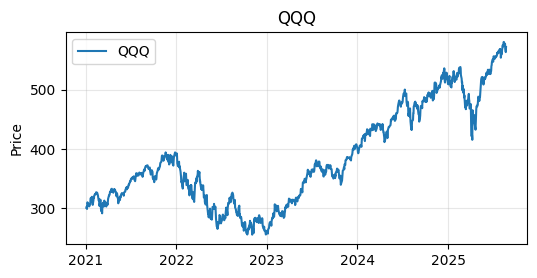


--- Data Fetching and Plotting Complete ---


In [5]:
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json # Explicitly import json

# -------------------------------------------------------------
# Portfolio Configuration
# (Combines content from your previous Cell 2 and Cell 3)
# -------------------------------------------------------------
API_KEY = "1VWXIAX2LM6F6WV0" # Your Alpha Vantage API key
START_YEAR = 2021             # Filter data from this year onwards

TICKERS = [ "QQQ"
    # Nasdaq Top 20 (US Equities - Large Cap)
    # "NVDA", "MSFT", "AAPL", "GOOGL", "AMZN", "META", "TSLA", "AVGO", "TSM", "INTC",
    # "ADBE", "CMCSA", "CSCO", "PEP", "TXN", "PYPL", "QCOM", "AMGN", "GILD", "CHTR",

    # # Europe Top (European Equities - Broad/Large Cap)
    # "SAP", "ASML", "MC.PA", "RMS.PA", "OR.PA", "AZN", "VGK",

    # # Asia/Global Diversifiers (Asian Equities & Resources)
    # "XOM", "TSM", "TCEHY", "FXI", "EWY",

    # Crypto (from Alpha Vantage, use SYMBOL-USD format)
    # "BTC-USD", "ETH-USD"
]

# -------------------------------------------------------------
# Robust Data Fetching Function
# (Content from your previous working fetch_alpha_vantage_data_robust function)
# -------------------------------------------------------------
def fetch_alpha_vantage_data_robust(ticker: str, api_key: str, output_size: str = "full") -> pd.DataFrame | None:
    """
    Fetch daily OHLCV data from Alpha Vantage for a single ticker (adjusted for stocks).
    Handles both TIME_SERIES_DAILY_ADJUSTED for stocks and DIGITAL_CURRENCY_DAILY for crypto.
    """
    base_url = "https://www.alphavantage.co/query"
    df = None

    def print_common_msgs(j: dict, ticker: str) -> bool:
        """Prints common Alpha Vantage messages (Note, Error Message, etc.) and indicates if it's a failure."""
        is_failure = False
        for k in ("Note", "Error Message", "Information", "Message"):
            if k in j:
                print(f"{ticker}: {k}: {j[k]}")
                if k in ("Error Message", "Information", "Message") or "frequency" in j[k].lower():
                    is_failure = True
        return is_failure

    # Crypto data
    if ticker.endswith("-USD"):
        params = {
            "function": "DIGITAL_CURRENCY_DAILY",
            "symbol": ticker.split("-")[0],
            "market": "USD",
            "apikey": api_key,
        }
        try:
            r = requests.get(base_url, params=params, timeout=20)
            r.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)
            j = r.json()
        except requests.exceptions.RequestException as e:
            print(f"Request failed for {ticker}: {e}")
            return None
        except json.JSONDecodeError:
            print(f"{ticker}: Response not JSON: {r.text[:200]}")
            return None

        if print_common_msgs(j, ticker):
            return None
        
        key = "Time Series (Digital Currency Daily)"
        if key not in j:
            print(f"{ticker}: missing '{key}' in response for crypto")
            return None
        
        ts = j[key]
        df = pd.DataFrame.from_dict(ts, orient="index").astype(float)
        df.index = pd.to_datetime(df.index)
        
        # Crypto close column is '4. close' based on your diagnostic
        close_col = "4. close" 
        
        if close_col not in df.columns:
            print(f"{ticker}: close column not found in crypto payload. Available: {df.columns.tolist()}")
            return None

        df = df.rename(columns={close_col: "Close"})
        df = df[["Close", "1. open", "2. high", "3. low"]].sort_index() # Include Open, High, Low
        df = df.rename(columns={"1. open": "Open", "2. high": "High", "3. low": "Low"}) # Rename for consistency
        df["Ticker"] = ticker
        return df

    # Stock data (adjusted for splits)
    params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": ticker,
        "outputsize": output_size,
        "apikey": api_key,
    }
    try:
        r = requests.get(base_url, params=params, timeout=20)
        r.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)
        j = r.json()
    except requests.exceptions.RequestException as e:
        print(f"Request failed for {ticker}: {e}")
        return None
    except json.JSONDecodeError:
        print(f"{ticker}: Response not JSON: {r.text[:200]}")
        return None

    if print_common_msgs(j, ticker):
        return None
    
    # Accept either "Time Series (Daily Adjusted)" or "Time Series (Daily)" keys
    key = None
    if "Time Series (Daily Adjusted)" in j:
        key = "Time Series (Daily Adjusted)"
    elif "Time Series (Daily)" in j:
        key = "Time Series (Daily)"
    
    if key is None:
        print(f"{ticker}: no daily time series key present in response")
        return None
    
    ts = j[key]
    df = pd.DataFrame.from_dict(ts, orient="index").astype(float)
    df.index = pd.to_datetime(df.index)
    
    # Prefer adjusted close when available, else fallback to raw close
    close_col = None
    if "5. adjusted close" in df.columns:
        close_col = "5. adjusted close"
    elif "4. close" in df.columns:
        close_col = "4. close"
    
    if close_col is None:
        print(f"{ticker}: no close column found (expected '5. adjusted close' or '4. close'). Available: {df.columns.tolist()}")
        return None
    
    # Include '1. open', '2. high', '3. low' for stocks
    df = df.rename(columns={
        close_col: "Close",
        "1. open": "Open",
        "2. high": "High",
        "3. low": "Low",
        "6. volume": "Volume" # Include volume as well
    })
    # Select desired columns and ensure correct order
    df = df[["Open", "High", "Low", "Close", "Volume"]].sort_index()
    df["Ticker"] = ticker
    return df

# -------------------------------------------------------------
# Main Data Fetching and Plotting Workflow
# -------------------------------------------------------------
print("\n--- Fetching Full Portfolio Data ---")
all_data = []

for ticker in TICKERS:
    print(f"Fetching {ticker} (full history)...")
    # Using the robust fetcher with output_size='full'
    df = fetch_alpha_vantage_data_robust(ticker, API_KEY, output_size="full") 
    if df is not None:
        # Filter from START_YEAR
        df = df[df.index.year >= START_YEAR]
        all_data.append(df)
        print(f"Successfully fetched {len(df)} records for {ticker}")
    time.sleep(12) # Respect Alpha Vantage API limit (5 requests/minute)

if not all_data:
    raise RuntimeError("No data was fetched for any ticker from Alpha Vantage. Please check API key, internet connection, or ticker symbols.")

data = pd.concat(all_data)
print("\n✅ All available data fetched and combined successfully!")
print(f"Combined data shape: {data.shape}")
print(f"Tickers in combined data: {data['Ticker'].unique().tolist()}")
print(f"Data covers: {data.index.min().date()} to {data.index.max().date()}")

# -------------------------------------------------------------
# Plotting - Individual Ticker Performance (small multiples)
# -------------------------------------------------------------
print("\n--- Plotting Individual Ticker Performance ---")
tickers_to_plot = data['Ticker'].unique()
n_plots = len(tickers_to_plot)
# Determine grid size for subplots
n_cols = 3 # You can adjust this for wider or narrower grids
n_rows = (n_plots + n_cols - 1) // n_cols

fig_multiples, axes_multiples = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows), sharex=True)
axes_multiples = axes_multiples.flatten() # Flatten for easy iteration

for i, ticker in enumerate(tickers_to_plot):
    ax = axes_multiples[i]
    ticker_data = data[data['Ticker'] == ticker]

    # Ensure unique index by grouping on Date if duplicates exist (shouldn't if data is clean)
    if not ticker_data.index.is_unique:
        ticker_data = ticker_data.groupby(ticker_data.index).mean(numeric_only=True)

    # Plot closing price, ensuring 'Close' column exists
    if 'Close' in ticker_data.columns:
        ax.plot(ticker_data.index, ticker_data['Close'], label=ticker, linewidth=1.5)
    else:
        print(f"⚠️ Warning: 'Close' column not found for {ticker}. Skipping individual plot.")
        continue

    # Formatting
    ax.set_title(ticker)
    ax.set_ylabel('Price')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')

# Set common X-axis locators/formatters only on the bottom row for clarity
for ax_row in axes_multiples.reshape(n_rows, n_cols)[-1]:
    ax_row.xaxis.set_major_locator(mdates.YearLocator())
    ax_row.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
# Hide any unused subplots
for j in range(i + 1, len(axes_multiples)):
    fig_multiples.delaxes(axes_multiples[j])

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
plt.show()

print("\n--- Data Fetching and Plotting Complete ---")

In [6]:
import pandas as pd
import numpy as np
import pandas_ta as ta

class Indicator:
    def __init__(self, data: pd.DataFrame):
        """
        Comprehensive technical indicator suite using pandas_ta
        :param data: DataFrame with OHLCV columns and datetime index
        """
        self.data = data
    
    def rsi(self, period: int = 14) -> pd.Series:
        """Calculate the Relative Strength Index (RSI) using pandas_ta."""
        return ta.rsi(self.data['Close'], length=period)
    
    def adx(self, period: int = 14) -> pd.Series:
        adx_df = ta.adx(self.data['High'], self.data['Low'], self.data['Close'], length=period)
        return adx_df[f'ADX_{period}']
        
    def kama(self, er_period: int = 8, fast_period: int = 7, slow_period: int = 19) -> pd.Series:
        """
        Calculate Kaufman Adaptive Moving Average (KAMA) using pandas_ta.
        
        KAMA adjusts its sensitivity based on market volatility.
        """
        return ta.kama(self.data['Close'], length=er_period, fast=fast_period, slow=slow_period)
    
    def atr(self, period: int = 14) -> pd.Series:
        """
        Calculate Average True Range (ATR) using pandas_ta.
        
        ATR measures market volatility.
        """
        return ta.atr(self.data['High'], self.data['Low'], self.data['Close'], length=period)
    
    def mfi(self, period: int = 14) -> pd.Series:
        """
        Calculate Money Flow Index (MFI) using pandas_ta.
        
        MFI is a momentum indicator that uses both price and volume.
        """
        return ta.mfi(self.data['High'], self.data['Low'], self.data['Close'], self.data['Volume'], length=period)

    def entropy(self, period: int = 14) -> pd.Series:
        """
        Calculate the Entropy of the time series using pandas_ta.
        
        Entropy measures the randomness or unpredictability of the price data.
        """
        return ta.entropy(self.data['Close'], length=period)



/Users/chielg/Documents/GitHub/TA_optimization/.venv/lib/python3.13/site-packages/pandas_ta/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [7]:
# buying and selling logic of indicators

In [8]:
data

,Open,High,Low,Close,Volume,Ticker
2021-01-04,315.11,315.290,305.1800,300.924340,45305898.0,QQQ
2021-01-05,308.29,312.140,308.2900,303.405207,29323409.0,QQQ
2021-01-06,307.00,311.880,305.9800,299.202326,52809622.0,QQQ
2021-01-07,310.28,315.840,310.2500,306.440622,30394826.0,QQQ
2021-01-08,317.34,319.390,315.0814,310.380823,33955847.0,QQQ
...,...,...,...,...,...,...
2025-08-18,576.44,577.765,575.2412,577.110000,29830957.0,QQQ
2025-08-19,576.39,576.560,568.2500,569.280000,53752635.0,QQQ
2025-08-20,568.33,568.450,558.8400,565.900000,76781087.0,QQQ
2025-08-21,564.35,566.490,560.9800,563.280000,46436899.0,QQQ


In [9]:
# Function to apply all indicators to a single ticker's data
def apply_indicators(ticker_data):
    indicator = Indicator(ticker_data)
    return ticker_data.assign(
        RSI_14=indicator.rsi(14),
        ADX_14=indicator.adx(14),
        KAMA=indicator.kama(er_period=8, fast_period=7, slow_period=19),
        ATR_14=indicator.atr(14),
        MFI_14=indicator.mfi(14),
        Entropy_14=indicator.entropy(14)  # Added entropy with 14-period window
    )
# Apply indicators to all tickers
data_with_indicators = data.groupby('Ticker', group_keys=False).apply(apply_indicators)

# Display results
print("Data with Technical Indicators:")
display(data_with_indicators.tail(10))

# Optional: Save to CSV
data_with_indicators.to_csv('all_tickers_with_indicators.csv')
print("Saved to all_tickers_with_indicators.csv")

Data with Technical Indicators:


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2907828957.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[9.02999921e+09 9.44803533e+09 1.06944192e+10 7.15882282e+09
 7.67095099e+09 9.79449166e+09 8.17207117e+09 1.26483808e+10
 8.30100932e+09 1.36941836e+10 1.13263874e+10 1.07416154e+10
 8.06007877e+09 7.28698172e+09 7.45842462e+09 6.75058864e+09
 5.73732205e+09 7.29452496e+09 6.75906780e+09 9.01765702e+09
 1.28698984e+10 1.85435978e+10 1.56784369e+10 2.47595962e+10
 2.37841502e+10 1.68321610e+10 1.35590944e+10 1.74882002e+10
 1.77258148e+10 1.68645977e+10 1.97718370e+10 1.70592752e+10
 1.73795079e+10 1.78877336e+10 1.37616015e+10 1.10125005e+10
 9.93445115e+09 1.22047273e+10 8.60909555e+09 1.02347990e+10
 1.22473569e+10 1.38305987e+10 1.22475537e+10 1.22262363e+10
 1.04103353e+10 1.27092322e+10 1.51272133e+10 1.76661042e+10
 2.21365138e+10 1.43070321e+10 1.50846334e+10 1.63748200e

,Open,High,Low,Close,Volume,Ticker,RSI_14,ADX_14,KAMA,ATR_14,MFI_14,Entropy_14
2025-08-11,574.69,576.8000,571.5700,572.85,33112917.0,QQQ,63.588484,25.694887,537.657543,6.543003,63.626706,3.823262
2025-08-12,575.16,580.3500,572.4850,580.05,42271441.0,QQQ,68.400083,26.694304,538.569246,6.637432,63.812890,3.825216
2025-08-13,582.76,583.3199,578.9400,580.34,41209294.0,QQQ,68.580179,27.916207,540.338107,6.476179,63.818841,3.826758
2025-08-14,578.28,581.8800,577.9100,579.89,45425043.0,QQQ,67.933185,28.795642,541.696917,6.297166,57.417560,3.827782
2025-08-15,579.80,579.8400,575.5743,577.34,49480161.0,QQQ,64.235028,29.039306,543.076431,6.155633,50.946507,3.827673
2025-08-18,576.44,577.7650,575.2412,577.11,29830957.0,QQQ,63.897152,29.183325,544.115529,5.896217,45.033134,3.827788
2025-08-19,576.39,576.5600,568.2500,569.28,53752635.0,QQQ,53.567109,27.777456,544.368356,6.107915,44.294657,3.825610
2025-08-20,568.33,568.4500,558.8400,565.90,76781087.0,QQQ,49.822666,26.620382,544.885047,6.417350,43.510506,3.823541
2025-08-21,564.35,566.4900,560.9800,563.28,46436899.0,QQQ,47.075690,25.545955,545.347009,6.352539,44.989127,3.823797
2025-08-22,564.67,573.9900,563.2700,571.97,51502129.0,QQQ,55.783610,24.098173,545.918740,6.664501,45.369993,3.823544


Saved to all_tickers_with_indicators.csv


In [10]:
# Define RSI parameters
periods = range(7, 91)  # 7 to 90 days
threshold = 50  # Buy above 50, sell below 50

print(f"Testing {len(periods)} RSI periods from {min(periods)} to {max(periods)} days")
print(f"Using fixed threshold: {threshold}\n")

Testing 84 RSI periods from 7 to 90 days
Using fixed threshold: 50



In [11]:
# Create master container for all calculations
all_calculations = {}

# Add OHLC data with ticker information
base_df = data[['Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()
all_calculations['base'] = base_df

print("Base OHLCV data with tickers:")
display(base_df.head(3))
print(f"\nTickers included: {base_df['Ticker'].unique().tolist()}")
print(f"Date range: {base_df.index.min()} to {base_df.index.max()}\n")

Base OHLCV data with tickers:


,Ticker,Open,High,Low,Close,Volume
2021-01-04,QQQ,315.11,315.29,305.18,300.924340,45305898.0
2021-01-05,QQQ,308.29,312.14,308.29,303.405207,29323409.0
2021-01-06,QQQ,307.00,311.88,305.98,299.202326,52809622.0



Tickers included: ['QQQ']
Date range: 2021-01-04 00:00:00 to 2025-08-22 00:00:00



In [12]:
# Calculate RSI for each period separately
for period in periods:
    # Create period-specific copy
    period_df = base_df.copy()
    
    # Calculate RSI per ticker
    def calculate_rsi(group):
        group[f'RSI_{period}'] = ta.rsi(group['Close'], length=period)
        return group
    
    period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)
    
    # Store in calculations dictionary
    all_calculations[f'RSI_{period}'] = period_df
    
    # Show detailed view for periods 7-28
    if 7 <= period <= 28:
        print("="*80)
        print(f"RSI CALCULATIONS FOR PERIOD {period} (FIRST 25 ROWS)")
        print("="*80)
        
        # Get first 25 rows with RSI values
        display_df = period_df.dropna(subset=[f'RSI_{period}']).head(25)
        
        # Show important columns including Open
        display(display_df[['Ticker', 'Open', 'Close', f'RSI_{period}']])
        
        # Show statistics
        print(f"\nStatistics for RSI_{period}:")
        print(f"Min: {display_df[f'RSI_{period}'].min():.2f}")
        print(f"Max: {display_df[f'RSI_{period}'].max():.2f}")
        print(f"Mean: {display_df[f'RSI_{period}'].mean():.2f}")
        print(f"NaN Count: {period_df[f'RSI_{period}'].isna().sum()}/{len(period_df)}")
        print("\n\n")

RSI CALCULATIONS FOR PERIOD 7 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_7
2021-01-13,QQQ,314.19,307.471884,62.517525
2021-01-14,QQQ,316.50,305.827701,55.467237
2021-01-15,QQQ,314.13,303.405207,46.460833
2021-01-19,QQQ,314.25,307.831853,60.228155
2021-01-20,QQQ,320.14,314.992317,73.222636
2021-01-21,QQQ,325.15,317.512100,76.389678
2021-01-22,QQQ,325.29,316.597584,72.746559
2021-01-25,QQQ,328.91,319.214656,76.489937
2021-01-26,QQQ,328.85,319.681643,77.143500
2021-01-27,QQQ,326.26,310.769978,47.651191



Statistics for RSI_7:
Min: 38.52
Max: 77.14
Mean: 63.26
NaN Count: 7/1165



RSI CALCULATIONS FOR PERIOD 8 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_8
2021-01-14,QQQ,316.50,305.827701,56.027673
2021-01-15,QQQ,314.13,303.405207,47.632676
2021-01-19,QQQ,314.25,307.831853,60.113601
2021-01-20,QQQ,320.14,314.992317,72.312654
2021-01-21,QQQ,325.15,317.512100,75.345257
2021-01-22,QQQ,325.29,316.597584,72.070985
2021-01-25,QQQ,328.91,319.214656,75.546480
2021-01-26,QQQ,328.85,319.681643,76.151681
2021-01-27,QQQ,326.26,310.769978,49.456699
2021-01-28,QQQ,320.67,312.608739,53.315736



Statistics for RSI_8:
Min: 40.63
Max: 76.15
Mean: 62.70
NaN Count: 8/1165



RSI CALCULATIONS FOR PERIOD 9 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_9
2021-01-15,QQQ,314.13,303.405207,48.505117
2021-01-19,QQQ,314.25,307.831853,60.055622
2021-01-20,QQQ,320.14,314.992317,71.634118
2021-01-21,QQQ,325.15,317.512100,74.554151
2021-01-22,QQQ,325.29,316.597584,71.546945
2021-01-25,QQQ,328.91,319.214656,74.817138
2021-01-26,QQQ,328.85,319.681643,75.385055
2021-01-27,QQQ,326.26,310.769978,50.793167
2021-01-28,QQQ,320.67,312.608739,54.256949
2021-01-29,QQQ,319.58,306.032008,42.281045



Statistics for RSI_9:
Min: 35.34
Max: 75.39
Mean: 61.84
NaN Count: 9/1165



RSI CALCULATIONS FOR PERIOD 10 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_10
2021-01-19,QQQ,314.25,307.831853,60.027543
2021-01-20,QQQ,320.14,314.992317,71.111511
2021-01-21,QQQ,325.15,317.512100,73.937263
2021-01-22,QQQ,325.29,316.597584,71.131464
2021-01-25,QQQ,328.91,319.214656,74.239776
2021-01-26,QQQ,328.85,319.681643,74.778198
2021-01-27,QQQ,326.26,310.769978,51.814720
2021-01-28,QQQ,320.67,312.608739,54.983951
2021-01-29,QQQ,319.58,306.032008,43.590117
2021-02-01,QQQ,318.11,313.678917,55.502592



Statistics for RSI_10:
Min: 36.49
Max: 74.78
Mean: 61.40
NaN Count: 10/1165



RSI CALCULATIONS FOR PERIOD 11 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_11
2021-01-20,QQQ,320.14,314.992317,70.698123
2021-01-21,QQQ,325.15,317.512100,73.444395
2021-01-22,QQQ,325.29,316.597584,70.795442
2021-01-25,QQQ,328.91,319.214656,73.773130
2021-01-26,QQQ,328.85,319.681643,74.287707
2021-01-27,QQQ,326.26,310.769978,52.616846
2021-01-28,QQQ,320.67,312.608739,55.559233
2021-01-29,QQQ,319.58,306.032008,44.650391
2021-02-01,QQQ,318.11,313.678917,55.760149
2021-02-02,QQQ,325.48,318.796314,61.455361



Statistics for RSI_11:
Min: 38.61
Max: 74.29
Mean: 60.89
NaN Count: 11/1165



RSI CALCULATIONS FOR PERIOD 12 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_12
2021-01-21,QQQ,325.15,317.512100,73.042491
2021-01-22,QQQ,325.29,316.597584,70.518879
2021-01-25,QQQ,328.91,319.214656,73.389126
2021-01-26,QQQ,328.85,319.681643,73.884072
2021-01-27,QQQ,326.26,310.769978,53.261075
2021-01-28,QQQ,320.67,312.608739,56.024015
2021-01-29,QQQ,319.58,306.032008,45.523673
2021-02-01,QQQ,318.11,313.678917,55.987093
2021-02-02,QQQ,325.48,318.796314,61.399720
2021-02-03,QQQ,329.82,317.531558,59.429230



Statistics for RSI_12:
Min: 32.57
Max: 73.88
Mean: 59.53
NaN Count: 12/1165



RSI CALCULATIONS FOR PERIOD 13 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_13
2021-01-22,QQQ,325.29,316.597584,70.287744
2021-01-25,QQQ,328.91,319.214656,73.068179
2021-01-26,QQQ,328.85,319.681643,73.546708
2021-01-27,QQQ,326.26,310.769978,53.788485
2021-01-28,QQQ,320.67,312.608739,56.406288
2021-01-29,QQQ,319.58,306.032008,46.253634
2021-02-01,QQQ,318.11,313.678917,56.186936
2021-02-02,QQQ,325.48,318.796314,61.363774
2021-02-03,QQQ,329.82,317.531558,59.482005
2021-02-04,QQQ,327.82,321.286910,63.119917



Statistics for RSI_13:
Min: 34.02
Max: 73.55
Mean: 58.26
NaN Count: 13/1165



RSI CALCULATIONS FOR PERIOD 14 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_14
2021-01-25,QQQ,328.91,319.214656,72.796297
2021-01-26,QQQ,328.85,319.681643,73.260908
2021-01-27,QQQ,326.26,310.769978,54.227368
2021-01-28,QQQ,320.67,312.608739,56.725581
2021-01-29,QQQ,319.58,306.032008,46.871764
2021-02-01,QQQ,318.11,313.678917,56.363327
2021-02-02,QQQ,325.48,318.796314,61.340842
2021-02-03,QQQ,329.82,317.531558,59.533402
2021-02-04,QQQ,327.82,321.286910,63.017857
2021-02-05,QQQ,331.22,322.376546,63.986837



Statistics for RSI_14:
Min: 35.30
Max: 73.26
Mean: 57.66
NaN Count: 14/1165



RSI CALCULATIONS FOR PERIOD 15 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_15
2021-01-26,QQQ,328.85,319.681643,73.015931
2021-01-27,QQQ,326.26,310.769978,54.597750
2021-01-28,QQQ,320.67,312.608739,56.995859
2021-01-29,QQQ,319.58,306.032008,47.401210
2021-02-01,QQQ,318.11,313.678917,56.519604
2021-02-02,QQQ,325.48,318.796314,61.326675
2021-02-03,QQQ,329.82,317.531558,59.582357
2021-02-04,QQQ,327.82,321.286910,62.936133
2021-02-05,QQQ,331.22,322.376546,63.868199
2021-02-08,QQQ,333.10,324.536360,65.700040



Statistics for RSI_15:
Min: 36.43
Max: 73.02
Mean: 56.75
NaN Count: 15/1165



RSI CALCULATIONS FOR PERIOD 16 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_16
2021-01-27,QQQ,326.26,310.769978,54.914156
2021-01-28,QQQ,320.67,312.608739,57.227331
2021-01-29,QQQ,319.58,306.032008,47.859302
2021-02-01,QQQ,318.11,313.678917,56.658671
2021-02-02,QQQ,325.48,318.796314,61.318500
2021-02-03,QQQ,329.82,317.531558,59.628420
2021-02-04,QQQ,327.82,321.286910,62.869703
2021-02-05,QQQ,331.22,322.376546,63.769965
2021-02-08,QQQ,333.10,324.536360,65.536662
2021-02-09,QQQ,332.62,324.468257,65.429352



Statistics for RSI_16:
Min: 37.42
Max: 67.46
Mean: 55.59
NaN Count: 16/1165



RSI CALCULATIONS FOR PERIOD 17 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_17
2021-01-28,QQQ,320.67,312.608739,57.427612
2021-01-29,QQQ,319.58,306.032008,48.259226
2021-02-01,QQQ,318.11,313.678917,56.782993
2021-02-02,QQQ,325.48,318.796314,61.314466
2021-02-03,QQQ,329.82,317.531558,59.671465
2021-02-04,QQQ,327.82,321.286910,62.814983
2021-02-05,QQQ,331.22,322.376546,63.687589
2021-02-08,QQQ,333.10,324.536360,65.397680
2021-02-09,QQQ,332.62,324.468257,65.294661
2021-02-10,QQQ,334.99,323.728862,64.129316



Statistics for RSI_17:
Min: 35.95
Max: 67.25
Mean: 55.04
NaN Count: 17/1165



RSI CALCULATIONS FOR PERIOD 18 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_18
2021-01-29,QQQ,319.580,306.032008,48.611173
2021-02-01,QQQ,318.110,313.678917,56.894643
2021-02-02,QQQ,325.480,318.796314,61.313317
2021-02-03,QQQ,329.820,317.531558,59.711547
2021-02-04,QQQ,327.820,321.286910,62.769376
2021-02-05,QQQ,331.220,322.376546,63.617729
2021-02-08,QQQ,333.100,324.536360,65.278221
2021-02-09,QQQ,332.620,324.468257,65.178905
2021-02-10,QQQ,334.990,323.728862,64.058511
2021-02-11,QQQ,334.330,325.509249,65.567524



Statistics for RSI_18:
Min: 36.55
Max: 67.06
Mean: 54.57
NaN Count: 18/1165



RSI CALCULATIONS FOR PERIOD 19 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_19
2021-02-01,QQQ,318.110,313.678917,56.995358
2021-02-02,QQQ,325.480,318.796314,61.314182
2021-02-03,QQQ,329.820,317.531558,59.748808
2021-02-04,QQQ,327.820,321.286910,62.730963
2021-02-05,QQQ,331.220,322.376546,63.557890
2021-02-08,QQQ,333.100,324.536360,65.174596
2021-02-09,QQQ,332.620,324.468257,65.078503
2021-02-10,QQQ,334.990,323.728862,63.997143
2021-02-11,QQQ,334.330,325.509249,65.456036
2021-02-12,QQQ,333.710,327.328551,66.902645



Statistics for RSI_19:
Min: 36.42
Max: 66.90
Mean: 54.27
NaN Count: 19/1165



RSI CALCULATIONS FOR PERIOD 20 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_20
2021-02-02,QQQ,325.480,318.796314,61.316452
2021-02-03,QQQ,329.820,317.531558,59.783433
2021-02-04,QQQ,327.820,321.286910,62.698304
2021-02-05,QQQ,331.220,322.376546,63.506173
2021-02-08,QQQ,333.100,324.536360,65.083962
2021-02-09,QQQ,332.620,324.468257,64.990700
2021-02-10,QQQ,334.990,323.728862,63.943532
2021-02-11,QQQ,334.330,325.509249,65.358279
2021-02-12,QQQ,333.710,327.328551,66.761121
2021-02-16,QQQ,337.270,326.443222,65.404394



Statistics for RSI_20:
Min: 36.87
Max: 66.76
Mean: 54.00
NaN Count: 20/1165



RSI CALCULATIONS FOR PERIOD 21 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_21
2021-02-03,QQQ,329.820,317.531558,59.815620
2021-02-04,QQQ,327.820,321.286910,62.670300
2021-02-05,QQQ,331.220,322.376546,63.461116
2021-02-08,QQQ,333.100,324.536360,65.004103
2021-02-09,QQQ,332.620,324.468257,64.913347
2021-02-10,QQQ,334.990,323.728862,63.896360
2021-02-11,QQQ,334.330,325.509249,65.271949
2021-02-12,QQQ,333.710,327.328551,66.635895
2021-02-16,QQQ,337.270,326.443222,65.324949
2021-02-17,QQQ,332.470,324.876871,63.021702



Statistics for RSI_21:
Min: 37.29
Max: 66.64
Mean: 53.52
NaN Count: 21/1165



RSI CALCULATIONS FOR PERIOD 22 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_22
2021-02-04,QQQ,327.820,321.286910,62.646101
2021-02-05,QQQ,331.220,322.376546,63.421574
2021-02-08,QQQ,333.100,324.536360,64.933269
2021-02-09,QQQ,332.620,324.468257,64.844745
2021-02-10,QQQ,334.990,323.728862,63.854583
2021-02-11,QQQ,334.330,325.509249,65.195220
2021-02-12,QQQ,333.710,327.328551,66.524389
2021-02-16,QQQ,337.270,326.443222,65.253957
2021-02-17,QQQ,332.470,324.876871,63.023167
2021-02-18,QQQ,330.230,323.456453,61.040719



Statistics for RSI_22:
Min: 37.68
Max: 66.52
Mean: 53.28
NaN Count: 22/1165



RSI CALCULATIONS FOR PERIOD 23 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_23
2021-02-05,QQQ,331.220,322.376546,63.386643
2021-02-08,QQQ,333.100,324.536360,64.870058
2021-02-09,QQQ,332.620,324.468257,64.783534
2021-02-10,QQQ,334.990,323.728862,63.817364
2021-02-11,QQQ,334.330,325.509249,65.126623
2021-02-12,QQQ,333.710,327.328551,66.424528
2021-02-16,QQQ,337.270,326.443222,65.190184
2021-02-17,QQQ,332.470,324.876871,63.023962
2021-02-18,QQQ,330.230,323.456453,61.099151
2021-02-19,QQQ,333.860,322.045763,59.221218



Statistics for RSI_23:
Min: 38.04
Max: 66.42
Mean: 52.86
NaN Count: 23/1165



RSI CALCULATIONS FOR PERIOD 24 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_24
2021-02-08,QQQ,333.100,324.536360,64.813340
2021-02-09,QQQ,332.620,324.468257,64.728618
2021-02-10,QQQ,334.990,323.728862,63.784026
2021-02-11,QQQ,334.330,325.509249,65.064969
2021-02-12,QQQ,333.710,327.328551,66.334627
2021-02-16,QQQ,337.270,326.443222,65.132619
2021-02-17,QQQ,332.470,324.876871,63.024268
2021-02-18,QQQ,330.230,323.456453,61.151173
2021-02-19,QQQ,333.860,322.045763,59.323996
2021-02-22,QQQ,326.500,313.698375,50.083894



Statistics for RSI_24:
Min: 38.38
Max: 66.33
Mean: 52.48
NaN Count: 24/1165



RSI CALCULATIONS FOR PERIOD 25 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_25
2021-02-09,QQQ,332.620,324.468257,64.679100
2021-02-10,QQQ,334.990,323.728862,63.754014
2021-02-11,QQQ,334.330,325.509249,65.009284
2021-02-12,QQQ,333.710,327.328551,66.253305
2021-02-16,QQQ,337.270,326.443222,65.080424
2021-02-17,QQQ,332.470,324.876871,63.024217
2021-02-18,QQQ,330.230,323.456453,61.197767
2021-02-19,QQQ,333.860,322.045763,59.416411
2021-02-22,QQQ,326.500,313.698375,50.377787
2021-02-23,QQQ,317.000,312.764401,49.500150



Statistics for RSI_25:
Min: 38.70
Max: 66.25
Mean: 52.08
NaN Count: 25/1165



RSI CALCULATIONS FOR PERIOD 26 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_26
2021-02-10,QQQ,334.990,323.728862,63.726874
2021-02-11,QQQ,334.330,325.509249,64.958765
2021-02-12,QQQ,333.710,327.328551,66.179418
2021-02-16,QQQ,337.270,326.443222,65.032905
2021-02-17,QQQ,332.470,324.876871,63.023907
2021-02-18,QQQ,330.230,323.456453,61.239723
2021-02-19,QQQ,333.860,322.045763,59.499923
2021-02-22,QQQ,326.500,313.698375,50.645511
2021-02-23,QQQ,317.000,312.764401,49.783435
2021-02-24,QQQ,318.740,315.342557,52.123022



Statistics for RSI_26:
Min: 38.99
Max: 66.18
Mean: 51.70
NaN Count: 26/1165



RSI CALCULATIONS FOR PERIOD 27 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_27
2021-02-11,QQQ,334.330,325.509249,64.912744
2021-02-12,QQQ,333.710,327.328551,66.112016
2021-02-16,QQQ,337.270,326.443222,64.989476
2021-02-17,QQQ,332.470,324.876871,63.023410
2021-02-18,QQQ,330.230,323.456453,61.277689
2021-02-19,QQQ,333.860,322.045763,59.575735
2021-02-22,QQQ,326.500,313.698375,50.890323
2021-02-23,QQQ,317.000,312.764401,50.042636
2021-02-24,QQQ,318.740,315.342557,52.319345
2021-02-25,QQQ,321.390,304.348910,43.533986



Statistics for RSI_27:
Min: 39.27
Max: 66.11
Mean: 51.15
NaN Count: 27/1165



RSI CALCULATIONS FOR PERIOD 28 (FIRST 25 ROWS)


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)


,Ticker,Open,Close,RSI_28
2021-02-12,QQQ,333.710,327.328551,66.050299
2021-02-16,QQQ,337.270,326.443222,64.949646
2021-02-17,QQQ,332.470,324.876871,63.022780
2021-02-18,QQQ,330.230,323.456453,61.312201
2021-02-19,QQQ,333.860,322.045763,59.644847
2021-02-22,QQQ,326.500,313.698375,51.114973
2021-02-23,QQQ,317.000,312.764401,50.280622
2021-02-24,QQQ,318.740,315.342557,52.500155
2021-02-25,QQQ,321.390,304.348910,43.844869
2021-02-26,QQQ,315.850,305.623395,44.936243



Statistics for RSI_28:
Min: 39.53
Max: 66.05
Mean: 50.57
NaN Count: 28/1165





/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_1659/2665607883.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_df = period_df.groupby('Ticker', group_keys=False).apply(calculate_rsi)
/var/f

In [13]:
# Step 4: State-based signals (RSI > threshold => 1, else -1). No zeros, only NaN where RSI is NaN.
print("="*80)
print("STEP 4: STATE-BASED SIGNAL GENERATION (no crossovers, no zeros)")
print("="*80)

def generate_state_signals(rsi_series: pd.Series, threshold: float) -> pd.Series:
    sig = pd.Series(np.where(rsi_series > threshold, 1, -1), index=rsi_series.index, dtype="float64")
    sig[rsi_series.isna()] = np.nan  # only NaN where RSI not available
    return sig

# Inspect many periods
INSPECT_PERIODS = list(range(7, 29)) + [30, 35, 40, 50, 60, 70, 80, 90]
INSPECTION_ROWS = 5

errors = 0
for period in periods:
    rsi_key = f"RSI_{period}"
    if rsi_key not in all_calculations:
        print(f"⛔️ Missing {rsi_key}. Run RSI step first.")
        errors += 1
        continue

    rsi_df = all_calculations[rsi_key].copy()

    # Build state-based signals from RSI
    sig = generate_state_signals(rsi_df[f"RSI_{period}"], threshold)
    rsi_df["Signal"] = sig

    # Sanity checks
    uniq = sorted(rsi_df["Signal"].dropna().unique().tolist())
    nan_share = rsi_df["Signal"].isna().mean()
    print(f"✅ Period {period}: unique signals (non-NaN) = {uniq}; NaN share = {nan_share:.3%}")

    # Store
    all_calculations[f"Signals_{period}"] = rsi_df

    # Expanded inspection for many periods
    if period in INSPECT_PERIODS:
        print("\n" + "-"*60)
        print(f"🔎 SIGNAL SAMPLE (PERIOD {period}) — first {INSPECTION_ROWS} and last {INSPECTION_ROWS}")
        print("-"*60)

        sample_cols = ["Ticker", "Open", "Close", f"RSI_{period}", "Signal"]

        head_df = rsi_df.dropna(subset=[f"RSI_{period}"]).head(INSPECTION_ROWS)
        tail_df = rsi_df.dropna(subset=[f"RSI_{period}"]).tail(INSPECTION_ROWS)

        if not head_df.empty:
            print("\nHead:")
            display(head_df[sample_cols])
        else:
            print("\nHead: no rows with valid RSI yet")

        if not tail_df.empty:
            print("\nTail:")
            display(tail_df[sample_cols])
        else:
            print("\nTail: no rows with valid RSI yet")

        # Distribution check
        dist = rsi_df["Signal"].value_counts(dropna=False).rename_axis("Signal").to_frame("Count")
        print("\nSignal distribution (including NaN):")
        display(dist)

        # Per-ticker quick audit (random 3 tickers)
        tickers = rsi_df["Ticker"].dropna().unique()
        if len(tickers) > 0:
            audit_tickers = np.random.choice(tickers, size=min(3, len(tickers)), replace=False)
            for t in audit_tickers:
                td = rsi_df[rsi_df["Ticker"] == t].dropna(subset=[f"RSI_{period}"]).tail(INSPECTION_ROWS)
                if not td.empty:
                    print(f"\nTicker audit: {t} (last {INSPECTION_ROWS})")
                    display(td[sample_cols])

print("\n" + "="*80)
print("STATE-BASED SIGNAL GENERATION SUMMARY")
print("="*80)
print(f"Completed with {errors} missing-RSI periods")
print("Notes:")
print("- Signals are strictly {1, -1} where RSI exists; NaN only where RSI is NaN")
print("- No zeros anywhere; thresholds apply deterministically per row")
print("- Use Step 5 to compute returns; if you want ‘always-in’ positions next-day, shift signals by 1 there")

STEP 4: STATE-BASED SIGNAL GENERATION (no crossovers, no zeros)
✅ Period 7: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 0.601%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 7) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_7,Signal
2021-01-13,QQQ,314.19,307.471884,62.517525,1.0
2021-01-14,QQQ,316.50,305.827701,55.467237,1.0
2021-01-15,QQQ,314.13,303.405207,46.460833,-1.0
2021-01-19,QQQ,314.25,307.831853,60.228155,1.0
2021-01-20,QQQ,320.14,314.992317,73.222636,1.0



Tail:


,Ticker,Open,Close,RSI_7,Signal
2025-08-18,QQQ,576.44,577.11,62.402552,1.0
2025-08-19,QQQ,576.39,569.28,42.647934,-1.0
2025-08-20,QQQ,568.33,565.90,36.783558,-1.0
2025-08-21,QQQ,564.35,563.28,32.715320,-1.0
2025-08-22,QQQ,564.67,571.97,52.881035,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,729
-1.0,429
NaN,7



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_7,Signal
2025-08-18,QQQ,576.44,577.11,62.402552,1.0
2025-08-19,QQQ,576.39,569.28,42.647934,-1.0
2025-08-20,QQQ,568.33,565.90,36.783558,-1.0
2025-08-21,QQQ,564.35,563.28,32.715320,-1.0
2025-08-22,QQQ,564.67,571.97,52.881035,1.0


✅ Period 8: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 0.687%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 8) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_8,Signal
2021-01-14,QQQ,316.50,305.827701,56.027673,1.0
2021-01-15,QQQ,314.13,303.405207,47.632676,-1.0
2021-01-19,QQQ,314.25,307.831853,60.113601,1.0
2021-01-20,QQQ,320.14,314.992317,72.312654,1.0
2021-01-21,QQQ,325.15,317.512100,75.345257,1.0



Tail:


,Ticker,Open,Close,RSI_8,Signal
2025-08-18,QQQ,576.44,577.11,62.782231,1.0
2025-08-19,QQQ,576.39,569.28,45.338495,-1.0
2025-08-20,QQQ,568.33,565.90,39.873010,-1.0
2025-08-21,QQQ,564.35,563.28,36.025753,-1.0
2025-08-22,QQQ,564.67,571.97,53.158107,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,739
-1.0,418
NaN,8



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_8,Signal
2025-08-18,QQQ,576.44,577.11,62.782231,1.0
2025-08-19,QQQ,576.39,569.28,45.338495,-1.0
2025-08-20,QQQ,568.33,565.90,39.873010,-1.0
2025-08-21,QQQ,564.35,563.28,36.025753,-1.0
2025-08-22,QQQ,564.67,571.97,53.158107,1.0


✅ Period 9: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 0.773%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 9) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_9,Signal
2021-01-15,QQQ,314.13,303.405207,48.505117,-1.0
2021-01-19,QQQ,314.25,307.831853,60.055622,1.0
2021-01-20,QQQ,320.14,314.992317,71.634118,1.0
2021-01-21,QQQ,325.15,317.512100,74.554151,1.0
2021-01-22,QQQ,325.29,316.597584,71.546945,1.0



Tail:


,Ticker,Open,Close,RSI_9,Signal
2025-08-18,QQQ,576.44,577.11,63.050765,1.0
2025-08-19,QQQ,576.39,569.28,47.419076,-1.0
2025-08-20,QQQ,568.33,565.90,42.323381,-1.0
2025-08-21,QQQ,564.35,563.28,38.697067,-1.0
2025-08-22,QQQ,564.67,571.97,53.548176,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,742
-1.0,414
NaN,9



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_9,Signal
2025-08-18,QQQ,576.44,577.11,63.050765,1.0
2025-08-19,QQQ,576.39,569.28,47.419076,-1.0
2025-08-20,QQQ,568.33,565.90,42.323381,-1.0
2025-08-21,QQQ,564.35,563.28,38.697067,-1.0
2025-08-22,QQQ,564.67,571.97,53.548176,1.0


✅ Period 10: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 0.858%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 10) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_10,Signal
2021-01-19,QQQ,314.25,307.831853,60.027543,1.0
2021-01-20,QQQ,320.14,314.992317,71.111511,1.0
2021-01-21,QQQ,325.15,317.512100,73.937263,1.0
2021-01-22,QQQ,325.29,316.597584,71.131464,1.0
2021-01-25,QQQ,328.91,319.214656,74.239776,1.0



Tail:


,Ticker,Open,Close,RSI_10,Signal
2025-08-18,QQQ,576.44,577.11,63.266727,1.0
2025-08-19,QQQ,576.39,569.28,49.093019,-1.0
2025-08-20,QQQ,568.33,565.90,44.329643,-1.0
2025-08-21,QQQ,564.35,563.28,40.910830,-1.0
2025-08-22,QQQ,564.67,571.97,53.988340,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,747
-1.0,408
NaN,10



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_10,Signal
2025-08-18,QQQ,576.44,577.11,63.266727,1.0
2025-08-19,QQQ,576.39,569.28,49.093019,-1.0
2025-08-20,QQQ,568.33,565.90,44.329643,-1.0
2025-08-21,QQQ,564.35,563.28,40.910830,-1.0
2025-08-22,QQQ,564.67,571.97,53.988340,1.0


✅ Period 11: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 0.944%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 11) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_11,Signal
2021-01-20,QQQ,320.14,314.992317,70.698123,1.0
2021-01-21,QQQ,325.15,317.512100,73.444395,1.0
2021-01-22,QQQ,325.29,316.597584,70.795442,1.0
2021-01-25,QQQ,328.91,319.214656,73.773130,1.0
2021-01-26,QQQ,328.85,319.681643,74.287707,1.0



Tail:


,Ticker,Open,Close,RSI_11,Signal
2025-08-18,QQQ,576.44,577.11,63.453730,1.0
2025-08-19,QQQ,576.39,569.28,50.482135,1.0
2025-08-20,QQQ,568.33,565.90,46.015429,-1.0
2025-08-21,QQQ,564.35,563.28,42.787363,-1.0
2025-08-22,QQQ,564.67,571.97,54.446617,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,748
-1.0,406
NaN,11



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_11,Signal
2025-08-18,QQQ,576.44,577.11,63.453730,1.0
2025-08-19,QQQ,576.39,569.28,50.482135,1.0
2025-08-20,QQQ,568.33,565.90,46.015429,-1.0
2025-08-21,QQQ,564.35,563.28,42.787363,-1.0
2025-08-22,QQQ,564.67,571.97,54.446617,1.0


✅ Period 12: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.030%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 12) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_12,Signal
2021-01-21,QQQ,325.15,317.512100,73.042491,1.0
2021-01-22,QQQ,325.29,316.597584,70.518879,1.0
2021-01-25,QQQ,328.91,319.214656,73.389126,1.0
2021-01-26,QQQ,328.85,319.681643,73.884072,1.0
2021-01-27,QQQ,326.26,310.769978,53.261075,1.0



Tail:


,Ticker,Open,Close,RSI_12,Signal
2025-08-18,QQQ,576.44,577.11,63.620324,1.0
2025-08-19,QQQ,576.39,569.28,51.661673,1.0
2025-08-20,QQQ,568.33,565.90,47.460575,-1.0
2025-08-21,QQQ,564.35,563.28,44.406932,-1.0
2025-08-22,QQQ,564.67,571.97,54.905222,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,753
-1.0,400
NaN,12



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_12,Signal
2025-08-18,QQQ,576.44,577.11,63.620324,1.0
2025-08-19,QQQ,576.39,569.28,51.661673,1.0
2025-08-20,QQQ,568.33,565.90,47.460575,-1.0
2025-08-21,QQQ,564.35,563.28,44.406932,-1.0
2025-08-22,QQQ,564.67,571.97,54.905222,1.0


✅ Period 13: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.116%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 13) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_13,Signal
2021-01-22,QQQ,325.29,316.597584,70.287744,1.0
2021-01-25,QQQ,328.91,319.214656,73.068179,1.0
2021-01-26,QQQ,328.85,319.681643,73.546708,1.0
2021-01-27,QQQ,326.26,310.769978,53.788485,1.0
2021-01-28,QQQ,320.67,312.608739,56.406288,1.0



Tail:


,Ticker,Open,Close,RSI_13,Signal
2025-08-18,QQQ,576.44,577.11,63.768416,1.0
2025-08-19,QQQ,576.39,569.28,52.679527,1.0
2025-08-20,QQQ,568.33,565.90,48.717778,-1.0
2025-08-21,QQQ,564.35,563.28,45.823877,-1.0
2025-08-22,QQQ,564.67,571.97,55.353291,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,751
-1.0,401
NaN,13



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_13,Signal
2025-08-18,QQQ,576.44,577.11,63.768416,1.0
2025-08-19,QQQ,576.39,569.28,52.679527,1.0
2025-08-20,QQQ,568.33,565.90,48.717778,-1.0
2025-08-21,QQQ,564.35,563.28,45.823877,-1.0
2025-08-22,QQQ,564.67,571.97,55.353291,1.0


✅ Period 14: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.202%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 14) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_14,Signal
2021-01-25,QQQ,328.91,319.214656,72.796297,1.0
2021-01-26,QQQ,328.85,319.681643,73.260908,1.0
2021-01-27,QQQ,326.26,310.769978,54.227368,1.0
2021-01-28,QQQ,320.67,312.608739,56.725581,1.0
2021-01-29,QQQ,319.58,306.032008,46.871764,-1.0



Tail:


,Ticker,Open,Close,RSI_14,Signal
2025-08-18,QQQ,576.44,577.11,63.897152,1.0
2025-08-19,QQQ,576.39,569.28,53.567109,1.0
2025-08-20,QQQ,568.33,565.90,49.822666,-1.0
2025-08-21,QQQ,564.35,563.28,47.075690,-1.0
2025-08-22,QQQ,564.67,571.97,55.783610,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,751
-1.0,400
NaN,14



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_14,Signal
2025-08-18,QQQ,576.44,577.11,63.897152,1.0
2025-08-19,QQQ,576.39,569.28,53.567109,1.0
2025-08-20,QQQ,568.33,565.90,49.822666,-1.0
2025-08-21,QQQ,564.35,563.28,47.075690,-1.0
2025-08-22,QQQ,564.67,571.97,55.783610,1.0


✅ Period 15: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.288%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 15) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_15,Signal
2021-01-26,QQQ,328.85,319.681643,73.015931,1.0
2021-01-27,QQQ,326.26,310.769978,54.597750,1.0
2021-01-28,QQQ,320.67,312.608739,56.995859,1.0
2021-01-29,QQQ,319.58,306.032008,47.401210,-1.0
2021-02-01,QQQ,318.11,313.678917,56.519604,1.0



Tail:


,Ticker,Open,Close,RSI_15,Signal
2025-08-18,QQQ,576.44,577.11,64.004824,1.0
2025-08-19,QQQ,576.39,569.28,54.345746,1.0
2025-08-20,QQQ,568.33,565.90,50.800021,1.0
2025-08-21,QQQ,564.35,563.28,48.188858,-1.0
2025-08-22,QQQ,564.67,571.97,56.191138,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,746
-1.0,404
NaN,15



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_15,Signal
2025-08-18,QQQ,576.44,577.11,64.004824,1.0
2025-08-19,QQQ,576.39,569.28,54.345746,1.0
2025-08-20,QQQ,568.33,565.90,50.800021,1.0
2025-08-21,QQQ,564.35,563.28,48.188858,-1.0
2025-08-22,QQQ,564.67,571.97,56.191138,1.0


✅ Period 16: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.373%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 16) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_16,Signal
2021-01-27,QQQ,326.26,310.769978,54.914156,1.0
2021-01-28,QQQ,320.67,312.608739,57.227331,1.0
2021-01-29,QQQ,319.58,306.032008,47.859302,-1.0
2021-02-01,QQQ,318.11,313.678917,56.658671,1.0
2021-02-02,QQQ,325.48,318.796314,61.318500,1.0



Tail:


,Ticker,Open,Close,RSI_16,Signal
2025-08-18,QQQ,576.44,577.11,64.089813,1.0
2025-08-19,QQQ,576.39,569.28,55.030532,1.0
2025-08-20,QQQ,568.33,565.90,51.667683,1.0
2025-08-21,QQQ,564.35,563.28,49.182667,-1.0
2025-08-22,QQQ,564.67,571.97,56.572319,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,750
-1.0,399
NaN,16



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_16,Signal
2025-08-18,QQQ,576.44,577.11,64.089813,1.0
2025-08-19,QQQ,576.39,569.28,55.030532,1.0
2025-08-20,QQQ,568.33,565.90,51.667683,1.0
2025-08-21,QQQ,564.35,563.28,49.182667,-1.0
2025-08-22,QQQ,564.67,571.97,56.572319,1.0


✅ Period 17: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.459%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 17) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_17,Signal
2021-01-28,QQQ,320.67,312.608739,57.427612,1.0
2021-01-29,QQQ,319.58,306.032008,48.259226,-1.0
2021-02-01,QQQ,318.11,313.678917,56.782993,1.0
2021-02-02,QQQ,325.48,318.796314,61.314466,1.0
2021-02-03,QQQ,329.82,317.531558,59.671465,1.0



Tail:


,Ticker,Open,Close,RSI_17,Signal
2025-08-18,QQQ,576.44,577.11,64.151031,1.0
2025-08-19,QQQ,576.39,569.28,55.632704,1.0
2025-08-20,QQQ,568.33,565.90,52.439039,1.0
2025-08-21,QQQ,564.35,563.28,50.071676,1.0
2025-08-22,QQQ,564.67,571.97,56.924749,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,759
-1.0,389
NaN,17



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_17,Signal
2025-08-18,QQQ,576.44,577.11,64.151031,1.0
2025-08-19,QQQ,576.39,569.28,55.632704,1.0
2025-08-20,QQQ,568.33,565.90,52.439039,1.0
2025-08-21,QQQ,564.35,563.28,50.071676,1.0
2025-08-22,QQQ,564.67,571.97,56.924749,1.0


✅ Period 18: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.545%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 18) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_18,Signal
2021-01-29,QQQ,319.58,306.032008,48.611173,-1.0
2021-02-01,QQQ,318.11,313.678917,56.894643,1.0
2021-02-02,QQQ,325.48,318.796314,61.313317,1.0
2021-02-03,QQQ,329.82,317.531558,59.711547,1.0
2021-02-04,QQQ,327.82,321.286910,62.769376,1.0



Tail:


,Ticker,Open,Close,RSI_18,Signal
2025-08-18,QQQ,576.44,577.11,64.188069,1.0
2025-08-19,QQQ,576.39,569.28,56.161095,1.0
2025-08-20,QQQ,568.33,565.90,53.124606,1.0
2025-08-21,QQQ,564.35,563.28,50.867336,1.0
2025-08-22,QQQ,564.67,571.97,57.246981,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,765
-1.0,382
NaN,18



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_18,Signal
2025-08-18,QQQ,576.44,577.11,64.188069,1.0
2025-08-19,QQQ,576.39,569.28,56.161095,1.0
2025-08-20,QQQ,568.33,565.90,53.124606,1.0
2025-08-21,QQQ,564.35,563.28,50.867336,1.0
2025-08-22,QQQ,564.67,571.97,57.246981,1.0


✅ Period 19: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.631%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 19) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_19,Signal
2021-02-01,QQQ,318.11,313.678917,56.995358,1.0
2021-02-02,QQQ,325.48,318.796314,61.314182,1.0
2021-02-03,QQQ,329.82,317.531558,59.748808,1.0
2021-02-04,QQQ,327.82,321.286910,62.730963,1.0
2021-02-05,QQQ,331.22,322.376546,63.557890,1.0



Tail:


,Ticker,Open,Close,RSI_19,Signal
2025-08-18,QQQ,576.44,577.11,64.201195,1.0
2025-08-19,QQQ,576.39,569.28,56.623033,1.0
2025-08-20,QQQ,568.33,565.90,53.733031,1.0
2025-08-21,QQQ,564.35,563.28,51.579040,1.0
2025-08-22,QQQ,564.67,571.97,57.538387,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,771
-1.0,375
NaN,19



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_19,Signal
2025-08-18,QQQ,576.44,577.11,64.201195,1.0
2025-08-19,QQQ,576.39,569.28,56.623033,1.0
2025-08-20,QQQ,568.33,565.90,53.733031,1.0
2025-08-21,QQQ,564.35,563.28,51.579040,1.0
2025-08-22,QQQ,564.67,571.97,57.538387,1.0


✅ Period 20: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.717%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 20) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_20,Signal
2021-02-02,QQQ,325.48,318.796314,61.316452,1.0
2021-02-03,QQQ,329.82,317.531558,59.783433,1.0
2021-02-04,QQQ,327.82,321.286910,62.698304,1.0
2021-02-05,QQQ,331.22,322.376546,63.506173,1.0
2021-02-08,QQQ,333.10,324.536360,65.083962,1.0



Tail:


,Ticker,Open,Close,RSI_20,Signal
2025-08-18,QQQ,576.44,577.11,64.191264,1.0
2025-08-19,QQQ,576.39,569.28,57.024870,1.0
2025-08-20,QQQ,568.33,565.90,54.271721,1.0
2025-08-21,QQQ,564.35,563.28,52.214789,1.0
2025-08-22,QQQ,564.67,571.97,57.799024,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,768
-1.0,377
NaN,20



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_20,Signal
2025-08-18,QQQ,576.44,577.11,64.191264,1.0
2025-08-19,QQQ,576.39,569.28,57.024870,1.0
2025-08-20,QQQ,568.33,565.90,54.271721,1.0
2025-08-21,QQQ,564.35,563.28,52.214789,1.0
2025-08-22,QQQ,564.67,571.97,57.799024,1.0


✅ Period 21: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.803%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 21) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_21,Signal
2021-02-03,QQQ,329.82,317.531558,59.815620,1.0
2021-02-04,QQQ,327.82,321.286910,62.670300,1.0
2021-02-05,QQQ,331.22,322.376546,63.461116,1.0
2021-02-08,QQQ,333.10,324.536360,65.004103,1.0
2021-02-09,QQQ,332.62,324.468257,64.913347,1.0



Tail:


,Ticker,Open,Close,RSI_21,Signal
2025-08-18,QQQ,576.44,577.11,64.159594,1.0
2025-08-19,QQQ,576.39,569.28,57.372295,1.0
2025-08-20,QQQ,568.33,565.90,54.747221,1.0
2025-08-21,QQQ,564.35,563.28,52.781617,1.0
2025-08-22,QQQ,564.67,571.97,58.029518,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,768
-1.0,376
NaN,21



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_21,Signal
2025-08-18,QQQ,576.44,577.11,64.159594,1.0
2025-08-19,QQQ,576.39,569.28,57.372295,1.0
2025-08-20,QQQ,568.33,565.90,54.747221,1.0
2025-08-21,QQQ,564.35,563.28,52.781617,1.0
2025-08-22,QQQ,564.67,571.97,58.029518,1.0


✅ Period 22: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.888%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 22) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_22,Signal
2021-02-04,QQQ,327.82,321.286910,62.646101,1.0
2021-02-05,QQQ,331.22,322.376546,63.421574,1.0
2021-02-08,QQQ,333.10,324.536360,64.933269,1.0
2021-02-09,QQQ,332.62,324.468257,64.844745,1.0
2021-02-10,QQQ,334.99,323.728862,63.854583,1.0



Tail:


,Ticker,Open,Close,RSI_22,Signal
2025-08-18,QQQ,576.44,577.11,64.107833,1.0
2025-08-19,QQQ,576.39,569.28,57.670512,1.0
2025-08-20,QQQ,568.33,565.90,55.165444,1.0
2025-08-21,QQQ,564.35,563.28,53.285844,1.0
2025-08-22,QQQ,564.67,571.97,58.230943,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,774
-1.0,369
NaN,22



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_22,Signal
2025-08-18,QQQ,576.44,577.11,64.107833,1.0
2025-08-19,QQQ,576.39,569.28,57.670512,1.0
2025-08-20,QQQ,568.33,565.90,55.165444,1.0
2025-08-21,QQQ,564.35,563.28,53.285844,1.0
2025-08-22,QQQ,564.67,571.97,58.230943,1.0


✅ Period 23: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 1.974%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 23) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_23,Signal
2021-02-05,QQQ,331.22,322.376546,63.386643,1.0
2021-02-08,QQQ,333.10,324.536360,64.870058,1.0
2021-02-09,QQQ,332.62,324.468257,64.783534,1.0
2021-02-10,QQQ,334.99,323.728862,63.817364,1.0
2021-02-11,QQQ,334.33,325.509249,65.126623,1.0



Tail:


,Ticker,Open,Close,RSI_23,Signal
2025-08-18,QQQ,576.44,577.11,64.037843,1.0
2025-08-19,QQQ,576.39,569.28,57.924329,1.0
2025-08-20,QQQ,568.33,565.90,55.531806,1.0
2025-08-21,QQQ,564.35,563.28,53.733234,1.0
2025-08-22,QQQ,564.67,571.97,58.404707,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,777
-1.0,365
NaN,23



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_23,Signal
2025-08-18,QQQ,576.44,577.11,64.037843,1.0
2025-08-19,QQQ,576.39,569.28,57.924329,1.0
2025-08-20,QQQ,568.33,565.90,55.531806,1.0
2025-08-21,QQQ,564.35,563.28,53.733234,1.0
2025-08-22,QQQ,564.67,571.97,58.404707,1.0


✅ Period 24: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 2.060%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 24) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_24,Signal
2021-02-08,QQQ,333.10,324.536360,64.813340,1.0
2021-02-09,QQQ,332.62,324.468257,64.728618,1.0
2021-02-10,QQQ,334.99,323.728862,63.784026,1.0
2021-02-11,QQQ,334.33,325.509249,65.064969,1.0
2021-02-12,QQQ,333.71,327.328551,66.334627,1.0



Tail:


,Ticker,Open,Close,RSI_24,Signal
2025-08-18,QQQ,576.44,577.11,63.951586,1.0
2025-08-19,QQQ,576.39,569.28,58.138206,1.0
2025-08-20,QQQ,568.33,565.90,55.851297,1.0
2025-08-21,QQQ,564.35,563.28,54.129087,1.0
2025-08-22,QQQ,564.67,571.97,58.552459,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,777
-1.0,364
NaN,24



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_24,Signal
2025-08-18,QQQ,576.44,577.11,63.951586,1.0
2025-08-19,QQQ,576.39,569.28,58.138206,1.0
2025-08-20,QQQ,568.33,565.90,55.851297,1.0
2025-08-21,QQQ,564.35,563.28,54.129087,1.0
2025-08-22,QQQ,564.67,571.97,58.552459,1.0


✅ Period 25: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 2.146%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 25) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_25,Signal
2021-02-09,QQQ,332.62,324.468257,64.679100,1.0
2021-02-10,QQQ,334.99,323.728862,63.754014,1.0
2021-02-11,QQQ,334.33,325.509249,65.009284,1.0
2021-02-12,QQQ,333.71,327.328551,66.253305,1.0
2021-02-16,QQQ,337.27,326.443222,65.080424,1.0



Tail:


,Ticker,Open,Close,RSI_25,Signal
2025-08-18,QQQ,576.44,577.11,63.851048,1.0
2025-08-19,QQQ,576.39,569.28,58.316281,1.0
2025-08-20,QQQ,568.33,565.90,56.128526,1.0
2025-08-21,QQQ,564.35,563.28,54.478292,1.0
2025-08-22,QQQ,564.67,571.97,58.675995,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,779
-1.0,361
NaN,25



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_25,Signal
2025-08-18,QQQ,576.44,577.11,63.851048,1.0
2025-08-19,QQQ,576.39,569.28,58.316281,1.0
2025-08-20,QQQ,568.33,565.90,56.128526,1.0
2025-08-21,QQQ,564.35,563.28,54.478292,1.0
2025-08-22,QQQ,564.67,571.97,58.675995,1.0


✅ Period 26: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 2.232%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 26) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_26,Signal
2021-02-10,QQQ,334.99,323.728862,63.726874,1.0
2021-02-11,QQQ,334.33,325.509249,64.958765,1.0
2021-02-12,QQQ,333.71,327.328551,66.179418,1.0
2021-02-16,QQQ,337.27,326.443222,65.032905,1.0
2021-02-17,QQQ,332.47,324.876871,63.023907,1.0



Tail:


,Ticker,Open,Close,RSI_26,Signal
2025-08-18,QQQ,576.44,577.11,63.738173,1.0
2025-08-19,QQQ,576.39,569.28,58.462378,1.0
2025-08-20,QQQ,568.33,565.90,56.367748,1.0
2025-08-21,QQQ,564.35,563.28,54.785359,1.0
2025-08-22,QQQ,564.67,571.97,58.777189,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,781
-1.0,358
NaN,26



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_26,Signal
2025-08-18,QQQ,576.44,577.11,63.738173,1.0
2025-08-19,QQQ,576.39,569.28,58.462378,1.0
2025-08-20,QQQ,568.33,565.90,56.367748,1.0
2025-08-21,QQQ,564.35,563.28,54.785359,1.0
2025-08-22,QQQ,564.67,571.97,58.777189,1.0


✅ Period 27: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 2.318%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 27) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_27,Signal
2021-02-11,QQQ,334.33,325.509249,64.912744,1.0
2021-02-12,QQQ,333.71,327.328551,66.112016,1.0
2021-02-16,QQQ,337.27,326.443222,64.989476,1.0
2021-02-17,QQQ,332.47,324.876871,63.023410,1.0
2021-02-18,QQQ,330.23,323.456453,61.277689,1.0



Tail:


,Ticker,Open,Close,RSI_27,Signal
2025-08-18,QQQ,576.44,577.11,63.614815,1.0
2025-08-19,QQQ,576.39,569.28,58.580016,1.0
2025-08-20,QQQ,568.33,565.90,56.572877,1.0
2025-08-21,QQQ,564.35,563.28,55.054445,1.0
2025-08-22,QQQ,564.67,571.97,58.857933,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,782
-1.0,356
NaN,27



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_27,Signal
2025-08-18,QQQ,576.44,577.11,63.614815,1.0
2025-08-19,QQQ,576.39,569.28,58.580016,1.0
2025-08-20,QQQ,568.33,565.90,56.572877,1.0
2025-08-21,QQQ,564.35,563.28,55.054445,1.0
2025-08-22,QQQ,564.67,571.97,58.857933,1.0


✅ Period 28: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 2.403%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 28) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_28,Signal
2021-02-12,QQQ,333.71,327.328551,66.050299,1.0
2021-02-16,QQQ,337.27,326.443222,64.949646,1.0
2021-02-17,QQQ,332.47,324.876871,63.022780,1.0
2021-02-18,QQQ,330.23,323.456453,61.312201,1.0
2021-02-19,QQQ,333.86,322.045763,59.644847,1.0



Tail:


,Ticker,Open,Close,RSI_28,Signal
2025-08-18,QQQ,576.44,577.11,63.482708,1.0
2025-08-19,QQQ,576.39,569.28,58.672420,1.0
2025-08-20,QQQ,568.33,565.90,56.747505,1.0
2025-08-21,QQQ,564.35,563.28,55.289369,1.0
2025-08-22,QQQ,564.67,571.97,58.920095,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,782
-1.0,355
NaN,28



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_28,Signal
2025-08-18,QQQ,576.44,577.11,63.482708,1.0
2025-08-19,QQQ,576.39,569.28,58.672420,1.0
2025-08-20,QQQ,568.33,565.90,56.747505,1.0
2025-08-21,QQQ,564.35,563.28,55.289369,1.0
2025-08-22,QQQ,564.67,571.97,58.920095,1.0


✅ Period 29: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 2.489%
✅ Period 30: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 2.575%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 30) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_30,Signal
2021-02-17,QQQ,332.47,324.876871,63.021267,1.0
2021-02-18,QQQ,330.23,323.456453,61.372564,1.0
2021-02-19,QQQ,333.86,322.045763,59.766181,1.0
2021-02-22,QQQ,326.50,313.698375,51.512790,1.0
2021-02-23,QQQ,317.00,312.764401,50.702366,1.0



Tail:


,Ticker,Open,Close,RSI_30,Signal
2025-08-18,QQQ,576.44,577.11,63.198493,1.0
2025-08-19,QQQ,576.39,569.28,58.793007,1.0
2025-08-20,QQQ,568.33,565.90,57.018090,1.0
2025-08-21,QQQ,564.35,563.28,55.670417,1.0
2025-08-22,QQQ,564.67,571.97,58.995802,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,780
-1.0,355
NaN,30



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_30,Signal
2025-08-18,QQQ,576.44,577.11,63.198493,1.0
2025-08-19,QQQ,576.39,569.28,58.793007,1.0
2025-08-20,QQQ,568.33,565.90,57.018090,1.0
2025-08-21,QQQ,564.35,563.28,55.670417,1.0
2025-08-22,QQQ,564.67,571.97,58.995802,1.0


✅ Period 31: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 2.661%
✅ Period 32: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 2.747%
✅ Period 33: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 2.833%
✅ Period 34: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 2.918%
✅ Period 35: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.004%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 35) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_35,Signal
2021-02-24,QQQ,318.74,315.342557,53.450217,1.0
2021-02-25,QQQ,321.39,304.348910,45.497858,-1.0
2021-02-26,QQQ,315.85,305.623395,46.448679,-1.0
2021-03-01,QQQ,319.27,314.817197,52.590537,1.0
2021-03-02,QQQ,324.25,309.767902,49.388128,-1.0



Tail:


,Ticker,Open,Close,RSI_35,Signal
2025-08-18,QQQ,576.44,577.11,62.428942,1.0
2025-08-19,QQQ,576.39,569.28,58.827081,1.0
2025-08-20,QQQ,568.33,565.90,57.356571,1.0
2025-08-21,QQQ,564.35,563.28,56.234887,1.0
2025-08-22,QQQ,564.67,571.97,58.974261,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,782
-1.0,348
NaN,35



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_35,Signal
2025-08-18,QQQ,576.44,577.11,62.428942,1.0
2025-08-19,QQQ,576.39,569.28,58.827081,1.0
2025-08-20,QQQ,568.33,565.90,57.356571,1.0
2025-08-21,QQQ,564.35,563.28,56.234887,1.0
2025-08-22,QQQ,564.67,571.97,58.974261,1.0


✅ Period 36: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.090%
✅ Period 37: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.176%
✅ Period 38: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.262%
✅ Period 39: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.348%
✅ Period 40: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.433%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 40) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_40,Signal
2021-03-03,QQQ,317.270,300.778407,45.122264,-1.0
2021-03-04,QQQ,308.780,295.855588,42.828600,-1.0
2021-03-05,QQQ,306.795,300.311420,45.404937,-1.0
2021-03-08,QQQ,308.120,291.808369,41.724835,-1.0
2021-03-09,QQQ,307.470,303.317647,47.618718,-1.0



Tail:


,Ticker,Open,Close,RSI_40,Signal
2025-08-18,QQQ,576.44,577.11,61.657532,1.0
2025-08-19,QQQ,576.39,569.28,58.641604,1.0
2025-08-20,QQQ,568.33,565.90,57.398561,1.0
2025-08-21,QQQ,564.35,563.28,56.447292,1.0
2025-08-22,QQQ,564.67,571.97,58.771697,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,785
-1.0,340
NaN,40



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_40,Signal
2025-08-18,QQQ,576.44,577.11,61.657532,1.0
2025-08-19,QQQ,576.39,569.28,58.641604,1.0
2025-08-20,QQQ,568.33,565.90,57.398561,1.0
2025-08-21,QQQ,564.35,563.28,56.447292,1.0
2025-08-22,QQQ,564.67,571.97,58.771697,1.0


✅ Period 41: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.519%
✅ Period 42: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.605%
✅ Period 43: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.691%
✅ Period 44: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.777%
✅ Period 45: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.863%
✅ Period 46: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 3.948%
✅ Period 47: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.034%
✅ Period 48: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.120%
✅ Period 49: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.206%
✅ Period 50: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.292%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 50) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_50,Signal
2021-03-17,QQQ,317.45,313.173014,52.173572,1.0
2021-03-18,QQQ,316.87,303.580327,48.362037,-1.0
2021-03-19,QQQ,311.87,304.650505,48.787941,-1.0
2021-03-22,QQQ,315.21,310.356189,50.987204,1.0
2021-03-23,QQQ,319.73,309.002198,50.462451,1.0



Tail:


,Ticker,Open,Close,RSI_50,Signal
2025-08-18,QQQ,576.44,577.11,60.291680,1.0
2025-08-19,QQQ,576.39,569.28,58.048169,1.0
2025-08-20,QQQ,568.33,565.90,57.112057,1.0
2025-08-21,QQQ,564.35,563.28,56.392740,1.0
2025-08-22,QQQ,564.67,571.97,58.175591,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,802
-1.0,313
NaN,50



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_50,Signal
2025-08-18,QQQ,576.44,577.11,60.291680,1.0
2025-08-19,QQQ,576.39,569.28,58.048169,1.0
2025-08-20,QQQ,568.33,565.90,57.112057,1.0
2025-08-21,QQQ,564.35,563.28,56.392740,1.0
2025-08-22,QQQ,564.67,571.97,58.175591,1.0


✅ Period 51: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.378%
✅ Period 52: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.464%
✅ Period 53: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.549%
✅ Period 54: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.635%
✅ Period 55: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.721%
✅ Period 56: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.807%
✅ Period 57: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.893%
✅ Period 58: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 4.979%
✅ Period 59: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 5.064%
✅ Period 60: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 5.150%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 60) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_60,Signal
2021-03-31,QQQ,316.16,310.862718,51.324930,1.0
2021-04-01,QQQ,323.07,316.161791,53.088639,1.0
2021-04-05,QQQ,327.13,322.473922,55.061141,1.0
2021-04-06,QQQ,330.73,322.249881,54.977701,1.0
2021-04-07,QQQ,330.33,323.029156,55.217750,1.0



Tail:


,Ticker,Open,Close,RSI_60,Signal
2025-08-18,QQQ,576.44,577.11,59.219438,1.0
2025-08-19,QQQ,576.39,569.28,57.446192,1.0
2025-08-20,QQQ,568.33,565.90,56.700862,1.0
2025-08-21,QQQ,564.35,563.28,56.126823,1.0
2025-08-22,QQQ,564.67,571.97,57.575548,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,806
-1.0,299
NaN,60



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_60,Signal
2025-08-18,QQQ,576.44,577.11,59.219438,1.0
2025-08-19,QQQ,576.39,569.28,57.446192,1.0
2025-08-20,QQQ,568.33,565.90,56.700862,1.0
2025-08-21,QQQ,564.35,563.28,56.126823,1.0
2025-08-22,QQQ,564.67,571.97,57.575548,1.0


✅ Period 61: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 5.236%
✅ Period 62: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 5.322%
✅ Period 63: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 5.408%
✅ Period 64: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 5.494%
✅ Period 65: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 5.579%
✅ Period 66: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 5.665%
✅ Period 67: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 5.751%
✅ Period 68: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 5.837%
✅ Period 69: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 5.923%
✅ Period 70: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.009%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 70) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_70,Signal
2021-04-15,QQQ,339.47,332.760358,57.417387,1.0
2021-04-16,QQQ,342.15,333.149996,57.521762,1.0
2021-04-19,QQQ,340.39,330.101081,56.423864,1.0
2021-04-20,QQQ,338.20,327.695068,55.574667,1.0
2021-04-21,QQQ,335.09,330.500459,56.351731,1.0



Tail:


,Ticker,Open,Close,RSI_70,Signal
2025-08-18,QQQ,576.44,577.11,58.400866,1.0
2025-08-19,QQQ,576.39,569.28,56.936603,1.0
2025-08-20,QQQ,568.33,565.90,56.318227,1.0
2025-08-21,QQQ,564.35,563.28,55.841302,1.0
2025-08-22,QQQ,564.67,571.97,57.064742,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,801
-1.0,294
NaN,70



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_70,Signal
2025-08-18,QQQ,576.44,577.11,58.400866,1.0
2025-08-19,QQQ,576.39,569.28,56.936603,1.0
2025-08-20,QQQ,568.33,565.90,56.318227,1.0
2025-08-21,QQQ,564.35,563.28,55.841302,1.0
2025-08-22,QQQ,564.67,571.97,57.064742,1.0


✅ Period 71: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.094%
✅ Period 72: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.180%
✅ Period 73: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.266%
✅ Period 74: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.352%
✅ Period 75: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.438%
✅ Period 76: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.524%
✅ Period 77: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.609%
✅ Period 78: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.695%
✅ Period 79: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.781%
✅ Period 80: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.867%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 80) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_80,Signal
2021-04-29,QQQ,342.37,331.406367,56.005714,1.0
2021-04-30,QQQ,337.70,329.234137,55.294239,1.0
2021-05-03,QQQ,339.23,327.480767,54.725973,1.0
2021-05-04,QQQ,333.56,321.587496,52.876369,1.0
2021-05-05,QQQ,332.25,320.506252,52.546410,1.0



Tail:


,Ticker,Open,Close,RSI_80,Signal
2025-08-18,QQQ,576.44,577.11,57.776097,1.0
2025-08-19,QQQ,576.39,569.28,56.527570,1.0
2025-08-20,QQQ,568.33,565.90,55.998584,1.0
2025-08-21,QQQ,564.35,563.28,55.590236,1.0
2025-08-22,QQQ,564.67,571.97,56.651942,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,788
-1.0,297
NaN,80



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_80,Signal
2025-08-18,QQQ,576.44,577.11,57.776097,1.0
2025-08-19,QQQ,576.39,569.28,56.527570,1.0
2025-08-20,QQQ,568.33,565.90,55.998584,1.0
2025-08-21,QQQ,564.35,563.28,55.590236,1.0
2025-08-22,QQQ,564.67,571.97,56.651942,1.0


✅ Period 81: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 6.953%
✅ Period 82: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 7.039%
✅ Period 83: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 7.124%
✅ Period 84: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 7.210%
✅ Period 85: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 7.296%
✅ Period 86: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 7.382%
✅ Period 87: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 7.468%
✅ Period 88: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 7.554%
✅ Period 89: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 7.639%
✅ Period 90: unique signals (non-NaN) = [-1.0, 1.0]; NaN share = 7.725%

------------------------------------------------------------
🔎 SIGNAL SAMPLE (PERIOD 90) — first 5 and last 5
------------------------------------------------------------

Head:


,Ticker,Open,Close,RSI_90,Signal
2021-05-13,QQQ,319.92,311.067278,49.928779,-1.0
2021-05-14,QQQ,322.60,317.934643,51.655341,1.0
2021-05-17,QQQ,324.63,316.005936,51.154378,1.0
2021-05-18,QQQ,325.39,313.872669,50.605446,1.0
2021-05-19,QQQ,316.66,314.233084,50.695838,1.0



Tail:


,Ticker,Open,Close,RSI_90,Signal
2025-08-18,QQQ,576.44,577.11,57.294810,1.0
2025-08-19,QQQ,576.39,569.28,56.204356,1.0
2025-08-20,QQQ,568.33,565.90,55.741255,1.0
2025-08-21,QQQ,564.35,563.28,55.383551,1.0
2025-08-22,QQQ,564.67,571.97,56.323631,1.0



Signal distribution (including NaN):


,Count
Signal,
1.0,778
-1.0,297
NaN,90



Ticker audit: QQQ (last 5)


,Ticker,Open,Close,RSI_90,Signal
2025-08-18,QQQ,576.44,577.11,57.294810,1.0
2025-08-19,QQQ,576.39,569.28,56.204356,1.0
2025-08-20,QQQ,568.33,565.90,55.741255,1.0
2025-08-21,QQQ,564.35,563.28,55.383551,1.0
2025-08-22,QQQ,564.67,571.97,56.323631,1.0



STATE-BASED SIGNAL GENERATION SUMMARY
Completed with 0 missing-RSI periods
Notes:
- Signals are strictly {1, -1} where RSI exists; NaN only where RSI is NaN
- No zeros anywhere; thresholds apply deterministically per row
- Use Step 5 to compute returns; if you want ‘always-in’ positions next-day, shift signals by 1 there


In [14]:
# ================================================================================
# STEP 5 (SAFE): RECOMPUTE RETURNS USING CLOSE-TO-CLOSE ONLY
# - Position = previous day's signal (no look-ahead)
# - Strategy_Return = Position * Close.pct_change()
# - No overnight/Open usage to avoid scale mismatch
# ================================================================================

print("="*80)
print("STEP 5 (SAFE): RECOMPUTE CLOSE-TO-CLOSE RETURNS ONLY")
print("="*80)

safe_returns = {}

# Determine periods to use
try:
    periods_to_use = list(periods)
except NameError:
    periods_to_use = sorted(int(k.split("_")[1]) for k in all_calculations if k.startswith("Signals_"))

for period in periods_to_use:
    sig_key = f"Signals_{period}"
    if sig_key not in all_calculations:
        print(f"⏭️ Skipping period {period}: signals not available")
        continue

    df = all_calculations[sig_key].copy()

    # Ensure per-ticker sort and compute close-to-close returns
    df = df.sort_index()
    df['Daily_Close2Close'] = df.groupby('Ticker')['Close'].pct_change()

    # Position = yesterday's signal
    df['Position'] = df.groupby('Ticker')['Signal'].shift(1)

    # Strategy return
    df['Strategy_Return'] = (df['Position'] * df['Daily_Close2Close']).fillna(0.0)

    safe_returns[period] = df
    all_calculations[f"Returns_{period}"] = df  # overwrite previous returns safely

    if period in [7, 14, 21, 28]:
        print(f"\nSample Period {period}:")
        display(df[['Ticker','Open','Close','Signal','Position','Daily_Close2Close','Strategy_Return']].dropna().head(8))

print("\nCLOSE-TO-CLOSE ONLY returns computed and stored in all_calculations[Returns_{period}]")

STEP 5 (SAFE): RECOMPUTE CLOSE-TO-CLOSE RETURNS ONLY

Sample Period 7:


,Ticker,Open,Close,Signal,Position,Daily_Close2Close,Strategy_Return
2021-01-14,QQQ,316.50,305.827701,1.0,1.0,-0.005347,-0.005347
2021-01-15,QQQ,314.13,303.405207,-1.0,1.0,-0.007921,-0.007921
2021-01-19,QQQ,314.25,307.831853,1.0,-1.0,0.014590,-0.014590
2021-01-20,QQQ,320.14,314.992317,1.0,1.0,0.023261,0.023261
2021-01-21,QQQ,325.15,317.512100,1.0,1.0,0.008000,0.008000
2021-01-22,QQQ,325.29,316.597584,1.0,1.0,-0.002880,-0.002880
2021-01-25,QQQ,328.91,319.214656,1.0,1.0,0.008266,0.008266
2021-01-26,QQQ,328.85,319.681643,1.0,1.0,0.001463,0.001463



Sample Period 14:


,Ticker,Open,Close,Signal,Position,Daily_Close2Close,Strategy_Return
2021-01-26,QQQ,328.85,319.681643,1.0,1.0,0.001463,0.001463
2021-01-27,QQQ,326.26,310.769978,1.0,1.0,-0.027877,-0.027877
2021-01-28,QQQ,320.67,312.608739,1.0,1.0,0.005917,0.005917
2021-01-29,QQQ,319.58,306.032008,-1.0,1.0,-0.021038,-0.021038
2021-02-01,QQQ,318.11,313.678917,1.0,-1.0,0.024987,-0.024987
2021-02-02,QQQ,325.48,318.796314,1.0,1.0,0.016314,0.016314
2021-02-03,QQQ,329.82,317.531558,1.0,1.0,-0.003967,-0.003967
2021-02-04,QQQ,327.82,321.286910,1.0,1.0,0.011827,0.011827



Sample Period 21:


,Ticker,Open,Close,Signal,Position,Daily_Close2Close,Strategy_Return
2021-02-04,QQQ,327.82,321.286910,1.0,1.0,0.011827,0.011827
2021-02-05,QQQ,331.22,322.376546,1.0,1.0,0.003391,0.003391
2021-02-08,QQQ,333.10,324.536360,1.0,1.0,0.006700,0.006700
2021-02-09,QQQ,332.62,324.468257,1.0,1.0,-0.000210,-0.000210
2021-02-10,QQQ,334.99,323.728862,1.0,1.0,-0.002279,-0.002279
2021-02-11,QQQ,334.33,325.509249,1.0,1.0,0.005500,0.005500
2021-02-12,QQQ,333.71,327.328551,1.0,1.0,0.005589,0.005589
2021-02-16,QQQ,337.27,326.443222,1.0,1.0,-0.002705,-0.002705



Sample Period 28:


,Ticker,Open,Close,Signal,Position,Daily_Close2Close,Strategy_Return
2021-02-16,QQQ,337.27,326.443222,1.0,1.0,-0.002705,-0.002705
2021-02-17,QQQ,332.47,324.876871,1.0,1.0,-0.004798,-0.004798
2021-02-18,QQQ,330.23,323.456453,1.0,1.0,-0.004372,-0.004372
2021-02-19,QQQ,333.86,322.045763,1.0,1.0,-0.004361,-0.004361
2021-02-22,QQQ,326.50,313.698375,1.0,1.0,-0.025920,-0.025920
2021-02-23,QQQ,317.00,312.764401,1.0,1.0,-0.002977,-0.002977
2021-02-24,QQQ,318.74,315.342557,1.0,1.0,0.008243,0.008243
2021-02-25,QQQ,321.39,304.348910,-1.0,1.0,-0.034863,-0.034863



CLOSE-TO-CLOSE ONLY returns computed and stored in all_calculations[Returns_{period}]


In [15]:
# ================================================================================
# STEP 6: DAILY PORTFOLIO RETURN AGGREGATION (reads from all_calculations)
# ================================================================================
print("="*80)
print("STEP 6: AGGREGATING DAILY PORTFOLIO RETURNS")
print("="*80)

# Use existing periods if defined; otherwise derive from available returns
try:
    periods_to_use = list(periods)
except NameError:
    periods_to_use = sorted(
        int(k.split("_")[1]) for k in all_calculations.keys() if k.startswith("Returns_")
    )

portfolio_returns = {}

for period in periods_to_use:
    key = f"Returns_{period}"
    if key not in all_calculations:
        print(f"⚠️ Skipping period {period}: '{key}' not found (run Step 5 first).")
        continue

    df = all_calculations[key].copy()

    # Ensure we have a 'Date' column
    if 'Date' not in df.columns:
        df = df.reset_index()
        if 'Date' not in df.columns:
            df = df.rename(columns={df.columns[0]: 'Date'})  # assume first col is date

    # Guard: need Strategy_Return
    if 'Strategy_Return' not in df.columns:
        print(f"⚠️ Skipping period {period}: 'Strategy_Return' not found in '{key}'.")
        continue

    # Equal-weighted portfolio: mean across tickers for each date
    daily_portfolio = (
        df.groupby('Date')['Strategy_Return']
          .mean()
          .to_frame(name='Portfolio_Return')
    )
    daily_portfolio['Period'] = period
    portfolio_returns[period] = daily_portfolio

    if period in [7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98]:
        print(f"\nPeriod {period} Portfolio Returns (sample):")
        display(daily_portfolio.tail(25))
        display(daily_portfolio.head(25))
        

# Combine all
if portfolio_returns:
    all_portfolio_returns = pd.concat(portfolio_returns.values())
    all_portfolio_returns.reset_index(inplace=True)  # Date becomes a column
    all_portfolio_returns.set_index(['Period', 'Date'], inplace=True)

    # Save
    out_path = 'grid_search_daily_portfolio_returns.csv'
    all_portfolio_returns.to_csv(out_path)
    print(f"\nSaved daily portfolio returns to '{out_path}'")

    # Show summary
    print("\nFinal shape:", all_portfolio_returns.shape)
    print("Periods:", all_portfolio_returns.index.get_level_values('Period').unique().tolist())
    display(all_portfolio_returns.head(10))
else:
    print("No portfolio returns aggregated. Ensure Step 5 completed and produced 'Returns_{period}' with 'Strategy_Return'.")

STEP 6: AGGREGATING DAILY PORTFOLIO RETURNS

Period 7 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,7
2025-07-22,-0.005176,7
2025-07-23,0.004561,7
2025-07-24,0.002128,7
2025-07-25,0.002407,7
2025-07-28,0.003125,7
2025-07-29,-0.001549,7
2025-07-30,0.001340,7
2025-07-31,-0.005299,7


,Portfolio_Return,Period
Date,,
2021-01-04,0.000000,7
2021-01-05,0.000000,7
2021-01-06,0.000000,7
2021-01-07,0.000000,7
2021-01-08,0.000000,7
2021-01-11,0.000000,7
2021-01-12,0.000000,7
2021-01-13,0.000000,7
2021-01-14,-0.005347,7



Period 14 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,14
2025-07-22,-0.005176,14
2025-07-23,0.004561,14
2025-07-24,0.002128,14
2025-07-25,0.002407,14
2025-07-28,0.003125,14
2025-07-29,-0.001549,14
2025-07-30,0.001340,14
2025-07-31,-0.005299,14


,Portfolio_Return,Period
Date,,
2021-01-04,0.000000,14
2021-01-05,0.000000,14
2021-01-06,0.000000,14
2021-01-07,0.000000,14
2021-01-08,0.000000,14
2021-01-11,0.000000,14
2021-01-12,0.000000,14
2021-01-13,0.000000,14
2021-01-14,0.000000,14



Period 21 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,21
2025-07-22,-0.005176,21
2025-07-23,0.004561,21
2025-07-24,0.002128,21
2025-07-25,0.002407,21
2025-07-28,0.003125,21
2025-07-29,-0.001549,21
2025-07-30,0.001340,21
2025-07-31,-0.005299,21


,Portfolio_Return,Period
Date,,
2021-01-04,0.000000,21
2021-01-05,0.000000,21
2021-01-06,0.000000,21
2021-01-07,0.000000,21
2021-01-08,0.000000,21
2021-01-11,0.000000,21
2021-01-12,0.000000,21
2021-01-13,0.000000,21
2021-01-14,0.000000,21



Period 28 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,28
2025-07-22,-0.005176,28
2025-07-23,0.004561,28
2025-07-24,0.002128,28
2025-07-25,0.002407,28
2025-07-28,0.003125,28
2025-07-29,-0.001549,28
2025-07-30,0.001340,28
2025-07-31,-0.005299,28


,Portfolio_Return,Period
Date,,
2021-01-04,0.0,28
2021-01-05,0.0,28
2021-01-06,0.0,28
2021-01-07,0.0,28
2021-01-08,0.0,28
2021-01-11,0.0,28
2021-01-12,0.0,28
2021-01-13,0.0,28
2021-01-14,0.0,28



Period 35 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,35
2025-07-22,-0.005176,35
2025-07-23,0.004561,35
2025-07-24,0.002128,35
2025-07-25,0.002407,35
2025-07-28,0.003125,35
2025-07-29,-0.001549,35
2025-07-30,0.001340,35
2025-07-31,-0.005299,35


,Portfolio_Return,Period
Date,,
2021-01-04,0.0,35
2021-01-05,0.0,35
2021-01-06,0.0,35
2021-01-07,0.0,35
2021-01-08,0.0,35
2021-01-11,0.0,35
2021-01-12,0.0,35
2021-01-13,0.0,35
2021-01-14,0.0,35



Period 42 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,42
2025-07-22,-0.005176,42
2025-07-23,0.004561,42
2025-07-24,0.002128,42
2025-07-25,0.002407,42
2025-07-28,0.003125,42
2025-07-29,-0.001549,42
2025-07-30,0.001340,42
2025-07-31,-0.005299,42


,Portfolio_Return,Period
Date,,
2021-01-04,0.0,42
2021-01-05,0.0,42
2021-01-06,0.0,42
2021-01-07,0.0,42
2021-01-08,0.0,42
2021-01-11,0.0,42
2021-01-12,0.0,42
2021-01-13,0.0,42
2021-01-14,0.0,42



Period 49 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,49
2025-07-22,-0.005176,49
2025-07-23,0.004561,49
2025-07-24,0.002128,49
2025-07-25,0.002407,49
2025-07-28,0.003125,49
2025-07-29,-0.001549,49
2025-07-30,0.001340,49
2025-07-31,-0.005299,49


,Portfolio_Return,Period
Date,,
2021-01-04,0.0,49
2021-01-05,0.0,49
2021-01-06,0.0,49
2021-01-07,0.0,49
2021-01-08,0.0,49
2021-01-11,0.0,49
2021-01-12,0.0,49
2021-01-13,0.0,49
2021-01-14,0.0,49



Period 56 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,56
2025-07-22,-0.005176,56
2025-07-23,0.004561,56
2025-07-24,0.002128,56
2025-07-25,0.002407,56
2025-07-28,0.003125,56
2025-07-29,-0.001549,56
2025-07-30,0.001340,56
2025-07-31,-0.005299,56


,Portfolio_Return,Period
Date,,
2021-01-04,0.0,56
2021-01-05,0.0,56
2021-01-06,0.0,56
2021-01-07,0.0,56
2021-01-08,0.0,56
2021-01-11,0.0,56
2021-01-12,0.0,56
2021-01-13,0.0,56
2021-01-14,0.0,56



Period 63 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,63
2025-07-22,-0.005176,63
2025-07-23,0.004561,63
2025-07-24,0.002128,63
2025-07-25,0.002407,63
2025-07-28,0.003125,63
2025-07-29,-0.001549,63
2025-07-30,0.001340,63
2025-07-31,-0.005299,63


,Portfolio_Return,Period
Date,,
2021-01-04,0.0,63
2021-01-05,0.0,63
2021-01-06,0.0,63
2021-01-07,0.0,63
2021-01-08,0.0,63
2021-01-11,0.0,63
2021-01-12,0.0,63
2021-01-13,0.0,63
2021-01-14,0.0,63



Period 70 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,70
2025-07-22,-0.005176,70
2025-07-23,0.004561,70
2025-07-24,0.002128,70
2025-07-25,0.002407,70
2025-07-28,0.003125,70
2025-07-29,-0.001549,70
2025-07-30,0.001340,70
2025-07-31,-0.005299,70


,Portfolio_Return,Period
Date,,
2021-01-04,0.0,70
2021-01-05,0.0,70
2021-01-06,0.0,70
2021-01-07,0.0,70
2021-01-08,0.0,70
2021-01-11,0.0,70
2021-01-12,0.0,70
2021-01-13,0.0,70
2021-01-14,0.0,70



Period 77 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,77
2025-07-22,-0.005176,77
2025-07-23,0.004561,77
2025-07-24,0.002128,77
2025-07-25,0.002407,77
2025-07-28,0.003125,77
2025-07-29,-0.001549,77
2025-07-30,0.001340,77
2025-07-31,-0.005299,77


,Portfolio_Return,Period
Date,,
2021-01-04,0.0,77
2021-01-05,0.0,77
2021-01-06,0.0,77
2021-01-07,0.0,77
2021-01-08,0.0,77
2021-01-11,0.0,77
2021-01-12,0.0,77
2021-01-13,0.0,77
2021-01-14,0.0,77



Period 84 Portfolio Returns (sample):


,Portfolio_Return,Period
Date,,
2025-07-21,0.005185,84
2025-07-22,-0.005176,84
2025-07-23,0.004561,84
2025-07-24,0.002128,84
2025-07-25,0.002407,84
2025-07-28,0.003125,84
2025-07-29,-0.001549,84
2025-07-30,0.001340,84
2025-07-31,-0.005299,84


,Portfolio_Return,Period
Date,,
2021-01-04,0.0,84
2021-01-05,0.0,84
2021-01-06,0.0,84
2021-01-07,0.0,84
2021-01-08,0.0,84
2021-01-11,0.0,84
2021-01-12,0.0,84
2021-01-13,0.0,84
2021-01-14,0.0,84



Saved daily portfolio returns to 'grid_search_daily_portfolio_returns.csv'

Final shape: (97860, 1)
Periods: [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


Portfolio_Return
Period Date                        
7      2021-01-04          0.000000
       2021-01-05          0.000000
       2021-01-06          0.000000
       2021-01-07          0.000000
       2021-01-08          0.000000
       2021-01-11          0.000000
       2021-01-12          0.000000
       2021-01-13          0.000000
       2021-01-14         -0.005347
       2021-01-15         -0.007921

In [16]:
# ================================================================================
# STEP 7: BACKTEST METRICS PER PERIOD
# - Metrics: Sharpe (annualized), rolling Sharpe, CAGR, Max DD, Profitable days %,
#            Avg win %, Avg loss %, Win/Loss ratio, Avg holding period (all/long/short)
# - Inputs: all_portfolio_returns from Step 6; Returns_{period} from Step 5
# ================================================================================

import numpy as np
import pandas as pd
from math import sqrt

TRADING_DAYS = 252
ROLLING_WINDOW = 63  # ~3 months

# Ensure we have all periods available
try:
    periods_to_use = list(periods)
except NameError:
    periods_to_use = sorted(
        int(k.split("_")[1]) for k in all_calculations.keys() if k.startswith("Returns_")
    )

# Ensure all_portfolio_returns exists; otherwise rebuild from Step 6 artifacts
if 'all_portfolio_returns' not in globals():
    # Attempt reconstruct from Step 6 portfolio_returns dict
    if 'portfolio_returns' in globals() and len(portfolio_returns) > 0:
        all_portfolio_returns = pd.concat(portfolio_returns.values())
        all_portfolio_returns.reset_index(inplace=True)  # Date -> column
        all_portfolio_returns.set_index(['Period', 'Date'], inplace=True)
    else:
        # Fallback: aggregate directly from Returns_{period}
        tmp_dict = {}
        for period in periods_to_use:
            key = f"Returns_{period}"
            if key not in all_calculations:
                continue
            df = all_calculations[key].copy()
            if 'Date' not in df.columns:
                df = df.reset_index()
                if 'Date' not in df.columns:
                    df = df.rename(columns={df.columns[0]: 'Date'})
            if 'Strategy_Return' not in df.columns:
                continue
            daily_portfolio = (
                df.groupby('Date')['Strategy_Return']
                  .mean()
                  .to_frame(name='Portfolio_Return')
            )
            daily_portfolio['Period'] = period
            tmp_dict[period] = daily_portfolio
        if not tmp_dict:
            raise ValueError("No portfolio return data found. Run Step 5 and Step 6 first.")
        all_portfolio_returns = pd.concat(tmp_dict.values())
        all_portfolio_returns.reset_index(inplace=True)
        all_portfolio_returns.set_index(['Period', 'Date'], inplace=True)

# Make sure Date index is datetime
all_portfolio_returns = all_portfolio_returns.copy()
idx = all_portfolio_returns.index
all_portfolio_returns.index = pd.MultiIndex.from_arrays(
    [idx.get_level_values(0),
     pd.to_datetime(idx.get_level_values(1))],
    names=['Period','Date']
)

def compute_max_drawdown(equity: pd.Series) -> float:
    running_max = equity.cummax()
    dd = equity / running_max - 1.0
    return float(dd.min())

def compute_cagr(returns: pd.Series) -> float:
    if returns.empty:
        return np.nan
    equity = (1.0 + returns).cumprod()
    start_date = returns.index.min()
    end_date = returns.index.max()
    num_years = (end_date - start_date).days / 365.25
    if num_years <= 0:
        return np.nan
    ending_value = float(equity.iloc[-1])
    if ending_value <= 0:
        return np.nan
    return ending_value**(1.0 / num_years) - 1.0

def compute_rolling_sharpe(returns: pd.Series, window: int) -> pd.Series:
    # Annualized rolling Sharpe with risk-free ~ 0
    roll_mean = returns.rolling(window, min_periods=window).mean()
    roll_std = returns.rolling(window, min_periods=window).std()
    rs = (roll_mean / roll_std) * sqrt(TRADING_DAYS)
    return rs.replace([np.inf, -np.inf], np.nan)

def summarize_holding_periods(returns_df: pd.DataFrame) -> dict:
    # Compute avg holding lengths across tickers for nonzero positions
    # returns_df must have ['Ticker','Position'] and be sorted by date per ticker
    all_lengths = []
    long_lengths = []
    short_lengths = []
    for _, g in returns_df.groupby('Ticker'):
        g = g.sort_index()
        pos = g['Position'].fillna(0)
        if pos.eq(0).all():
            continue
        # Identify runs where position remains constant and nonzero
        change = (pos != pos.shift(1))
        group_id = change.cumsum()
        run_df = pd.DataFrame({'pos': pos, 'gid': group_id})
        # Keep only nonzero position rows
        run_df_nz = run_df[pos != 0]
        if run_df_nz.empty:
            continue
        runs = run_df_nz.groupby('gid').agg(length=('pos','size'), side=('pos','first'))
        all_lengths.extend(runs['length'].tolist())
        long_lengths.extend(runs.loc[runs['side'] > 0, 'length'].tolist())
        short_lengths.extend(runs.loc[runs['side'] < 0, 'length'].tolist())

    def stats(arr):
        if len(arr) == 0:
            return np.nan
        return float(np.mean(arr))

    return {
        'Avg_Holding_Period_All': stats(all_lengths),
        'Avg_Holding_Period_Long': stats(long_lengths),
        'Avg_Holding_Period_Short': stats(short_lengths),
    }

# Containers
summary_rows = []
rolling_sharpe_wide = []  # will assemble into wide by Date with Period columns

for period in periods_to_use:
    # Slice portfolio series for this period
    try:
        dfp = all_portfolio_returns.xs(period, level='Period').sort_index()
    except KeyError:
        continue

    if 'Portfolio_Return' not in dfp.columns or dfp.empty:
        continue

    r = dfp['Portfolio_Return'].dropna().copy()

    # Metrics
    daily_mean = float(r.mean())
    daily_std = float(r.std())
    ann_vol = daily_std * sqrt(TRADING_DAYS) if daily_std > 0 else np.nan
    sharpe = (daily_mean / daily_std) * sqrt(TRADING_DAYS) if daily_std > 0 else np.nan
    cagr = compute_cagr(r)
    equity = (1.0 + r).cumprod()
    max_dd = compute_max_drawdown(equity)
    win_rate = float((r > 0).mean())
    avg_win = float(r[r > 0].mean()) if (r > 0).any() else np.nan
    avg_loss = float(r[r < 0].mean()) if (r < 0).any() else np.nan  # negative value
    win_loss_ratio = (avg_win / abs(avg_loss)) if (avg_loss is not np.nan and avg_loss != 0 and not np.isnan(avg_loss)) else np.nan

    # Rolling Sharpe
    rs = compute_rolling_sharpe(r, ROLLING_WINDOW)
    rs_df = pd.DataFrame({'Date': rs.index, 'Period': period, 'Rolling_Sharpe': rs.values})
    rolling_sharpe_wide.append(rs_df)

    # Holding periods from per-ticker positions
    hp_stats = {}
    key = f"Returns_{period}"
    if key in all_calculations:
        df_ret = all_calculations[key]
        # Ensure sorted by date per ticker
        if 'Date' not in df_ret.columns:
            df_ret = df_ret.reset_index()
            if 'Date' not in df_ret.columns:
                df_ret = df_ret.rename(columns={df_ret.columns[0]: 'Date'})
        hp_stats = summarize_holding_periods(df_ret[['Date','Ticker','Position']])

    summary_rows.append({
        'Period': period,
        'Days': int(len(r)),
        'Total_Return': float(equity.iloc[-1] - 1.0) if len(equity) else np.nan,
        'CAGR': cagr,
        'Ann_Sharpe': sharpe,
        'Ann_Vol': ann_vol,
        'Max_Drawdown': max_dd,
        'Profitable_Days_Pct': win_rate,
        'Avg_Win_Pct': avg_win,
        'Avg_Loss_Pct': avg_loss,
        'Win_Loss_Ratio': win_loss_ratio,
        'Avg_Holding_Period_All': hp_stats.get('Avg_Holding_Period_All', np.nan),
        'Avg_Holding_Period_Long': hp_stats.get('Avg_Holding_Period_Long', np.nan),
        'Avg_Holding_Period_Short': hp_stats.get('Avg_Holding_Period_Short', np.nan),
    })

# Build summary DataFrame
performance_summary = pd.DataFrame(summary_rows).set_index('Period').sort_index()

# Build rolling sharpe wide (Date index, Period columns)
if rolling_sharpe_wide:
    rs_all = pd.concat(rolling_sharpe_wide, ignore_index=True)
    rs_all['Date'] = pd.to_datetime(rs_all['Date'])
    rolling_sharpe_wide_df = rs_all.pivot(index='Date', columns='Period', values='Rolling_Sharpe').sort_index()
else:
    rolling_sharpe_wide_df = pd.DataFrame()

import os
os.makedirs('strategy_results', exist_ok=True)


# Save outputs
performance_summary.to_csv('strategy_results/performance_summary.csv')
rolling_sharpe_wide_df.to_csv('strategy_results/rolling_sharpe_wide.csv')

print("Saved:")
print("- strategy_results/performance_summary.csv")
print("- strategy_results/rolling_sharpe_wide.csv")

# Display quick samples
print("\nPerformance summary (head):")
display(performance_summary.head(10))

if not rolling_sharpe_wide_df.empty:
    print("\nRolling Sharpe (sample dates):")
    display(rolling_sharpe_wide_df.head(10))

Saved:
- strategy_results/performance_summary.csv
- strategy_results/rolling_sharpe_wide.csv

Performance summary (head):


,Days,Total_Return,CAGR,Ann_Sharpe,Ann_Vol,Max_Drawdown,Profitable_Days_Pct,Avg_Win_Pct,Avg_Loss_Pct,Win_Loss_Ratio,Avg_Holding_Period_All,Avg_Holding_Period_Long,Avg_Holding_Period_Short
Period,,,,,,,,,,,,,
7,1165,-0.061856,-0.013697,0.056182,0.230809,-0.341056,0.515880,0.010235,-0.010975,0.932549,6.573864,8.272727,4.875000
8,1165,-0.184630,-0.043130,-0.075254,0.230794,-0.379748,0.516738,0.010097,-0.011137,0.906629,7.225000,9.225000,5.225000
9,1165,-0.120986,-0.027469,-0.004902,0.230767,-0.378440,0.516738,0.010153,-0.011082,0.916160,8.076923,10.436620,5.750000
10,1165,-0.056674,-0.012523,0.061169,0.230666,-0.341650,0.515880,0.010216,-0.011005,0.928331,8.742424,11.303030,6.181818
11,1165,-0.279585,-0.068381,-0.192077,0.230396,-0.425661,0.508155,0.010124,-0.011068,0.914722,8.604478,11.149254,6.059701
12,1165,-0.099627,-0.022413,0.017184,0.230383,-0.387513,0.515880,0.010151,-0.011059,0.917895,9.442623,12.327869,6.557377
13,1165,-0.058928,-0.013033,0.058599,0.230378,-0.383983,0.513305,0.010237,-0.010977,0.932585,9.134921,11.904762,6.365079
14,1165,0.030876,0.006590,0.144147,0.230338,-0.352023,0.511588,0.010340,-0.010867,0.951552,9.274194,12.096774,6.451613
15,1165,0.074979,0.015739,0.183491,0.230331,-0.317977,0.510730,0.010392,-0.010828,0.959739,9.575000,12.416667,6.733333



Rolling Sharpe (sample dates):


Period,7,8,9,10,11,12,13,14,15,16,...,81,82,83,84,85,86,87,88,89,90
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# ================================================================================
# DIAGNOSTICS: CHECK SCALE MISMATCH AND EXTREME RETURNS
# ================================================================================

import numpy as np
import pandas as pd

# 1) Check Open vs Close scale (if Close is adjusted but Open is raw, ratios will be extreme)
def check_open_close_scale(df, label):
    z = df[['Ticker','Open','Close']].dropna().copy()
    z = z[z['Open'] != 0]
    z['close_open_ratio'] = z['Close'] / z['Open']
    by_ticker = z.groupby('Ticker')['close_open_ratio'].agg(['median','min','max'])
    bad = by_ticker[(by_ticker['median'] < 0.5) | (by_ticker['median'] > 2.0)]
    print(f"\n[{label}] Open vs Close scale check:")
    print(f"- Tick ers total: {by_ticker.shape[0]}")
    print(f"- Suspect scale tickers (median Close/Open outside [0.5, 2.0]): {bad.shape[0]}")
    display(bad.head(10))
    return bad

# 2) Check for -100% daily portfolio returns and Strategy_Return outliers
def check_strategy_return_outliers(periods_to_inspect):
    for p in periods_to_inspect:
        key = f"Returns_{p}"
        if key not in all_calculations:
            print(f"Missing {key}")
            continue
        df = all_calculations[key]
        if 'Strategy_Return' not in df.columns:
            print(f"{key} has no Strategy_Return")
            continue
        sr = df['Strategy_Return'].dropna()
        if sr.empty:
            print(f"{key} Strategy_Return empty")
            continue
        print(f"\n[Period {p}] Strategy_Return summary:")
        print(sr.describe(percentiles=[0.01, 0.05, 0.95, 0.99]))
        # Count extreme losses (≤ -95%) which drive equity to near zero
        extreme = (sr <= -0.95).sum()
        print(f"Count Strategy_Return <= -95%: {extreme}")

# Run scale check on a known Returns frame if available, else on base
some_period = None
for k in sorted(all_calculations.keys()):
    if k.startswith('Returns_'):
        some_period = int(k.split('_')[1])
        break

if some_period is not None:
    print(f"Using Returns_{some_period} for scale check sample")
    check_open_close_scale(all_calculations[f"Returns_{some_period}"], f"Returns_{some_period}")
else:
    print("No Returns_{period} found; run Step 5 first.")

# Outlier returns check on a few periods
periods_to_inspect = [7, 14, 21, 28]
check_strategy_return_outliers([p for p in periods_to_inspect if f"Returns_{p}" in all_calculations])

Using Returns_10 for scale check sample

[Returns_10] Open vs Close scale check:
- Tick ers total: 1
- Suspect scale tickers (median Close/Open outside [0.5, 2.0]): 0


,median,min,max
Ticker,,,



[Period 7] Strategy_Return summary:
count    1165.000000
mean        0.000051
std         0.014540
min        -0.120031
1%         -0.036431
5%         -0.023026
50%         0.000434
95%         0.023672
99%         0.036247
max         0.062109
Name: Strategy_Return, dtype: float64
Count Strategy_Return <= -95%: 0

[Period 14] Strategy_Return summary:
count    1165.000000
mean        0.000132
std         0.014510
min        -0.120031
1%         -0.033679
5%         -0.023026
50%         0.000295
95%         0.023719
99%         0.039566
max         0.062109
Name: Strategy_Return, dtype: float64
Count Strategy_Return <= -95%: 0

[Period 21] Strategy_Return summary:
count    1165.000000
mean        0.000121
std         0.014446
min        -0.120031
1%         -0.035643
5%         -0.023369
50%         0.000309
95%         0.023034
99%         0.038339
max         0.062109
Name: Strategy_Return, dtype: float64
Count Strategy_Return <= -95%: 0

[Period 28] Strategy_Return summary:
count 

In [18]:
# individueel plotten met buy strats gewoon voor visual en check


In [19]:
# 2018 tot 2022 modelleren wellicht en out of sample er voor of er na chechken,

# rollen sharpe en marco lopez sharpe checks

In [20]:
# QFLib visuals

In [21]:
from ftplib import all_errors


# of zelfde strategie tegelijkertijd testen op all_errors
# aparte strategie specialiseren op alle assets apart 
# generalized ranking voor alles en dat ook backtesten maybe